<a href="https://colab.research.google.com/github/celiaqt/Pneumonia_Diagnosis-Cause/blob/main/Pneumonia_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PERCEPTRON/MULTILAYER PERCEPTRON

### LA NEURONA BIOLÓGICA

Las redes neuronales intentan imitar el funcionamiento del cerebro humano, haciendo uso de las neuronas como las mínimas unidades de trabajo.
Para entender la estructura del cerebro es necesario presentar la anatomía de una neurona:


![red_neuronal.jpg](attachment:red_neuronal.jpg)

El papel que desempeñan los neurotransmisoreses es fundamental en el aprendizaje y almecenamiento de conocimientos.
Estos son los encargados de amplificar o disminuir la cantidad de potencial que se transmite de una neurona a otra, y es por este motivo por el que existen sinapsis inhibidoras y sinapsis excitadoras.
Queda reflejado que el flujo de información ( determinado por los neurotransmisores) accede a la neurona mediante las dendritas, para acabar en el soma, donde es procesada y enviada a otra neurona mediante las dendritas de la misma.




### LA NEURONA ARTIFICIAL Y EL APRENDIZAJE HEBBIANO

El primer algoritmo que presentaba una red neuronal simple se llamó Perceptrón, creado por Frank Rosenblatt en 1958, basado en el trabajo realizado previamente por Santiago Ramón y Cajal y  Charles Scott Sherrintong (pioneros en el estudio del funcionamiento del cerebro humano).

En la siguiente imagen podemos observar la estructura del perceptrón:

- x_i representa la neurona i-esima.
- w_i representa el valor de inhibición o exitación entre la neurona x_i y la neurona que vemos en la imagen.
- y representa el resultado generado por la nuerona i (equivalente a la salida del axón que se produce en la neurona biológica).
- La circunferencia azul representa el núcleo de la neurona, donde se calcula la suma de: cada resultado que llega por parte de cada neurona multiplicado por su respectivo valor de inhibición/exitación.
  A dicha suma se le aplica la función la función de salida o tranferencia, donde carece de sentido hacer uso de funciones lineales. Debido a que en este caso caeríamos en la linealidad del cómputo, pudiendo reducir todo el procedimiento a la implementación de una sola neurona.

![perceptron.png](attachment:perceptron.png)



El proceso de aprendizaje consisite en variar los valores de los pesos w_i siguiendo unas pautas establecidas.
En el caso de que w_i=0 se puede considerar que la conexión no aporta ningún tipo de información. 
Por otra parte, diremos que la red neuronal ha aprendido a la perfección cuando se han determinado los valores ideales para los w_i, de tal forma que por cada entrada que se le presenta nos proporciona el resultado esperado.

Podemos esquematizar el proceso de aprendizaje como sigue: 
    
    1. Se introducen los datos de partida a la red neuronal. 
    
    2.Se obtiene la salida de la red neuronal a partir de dicha información proporcionada. 
    
    3.Se compara la salida obtenida con la esperada. 
    
    4.Si existe un error significa que hay que variar los pesos para adaptar la red neuronal al objetivo deseado.
    
    5.El proceso se repite hasta que se considera aceptable la diferencia entre las salidas que se obtienen y las esperadas.

 El aprendizaje Hebbiano se implementa con la siguiente regla delta:
        
        \delta w_ij=\alpha*(d_i-y_i)
 
donde:
    
    - d_i es el valor de salida esperado de la neurona i.
    
    - y_ es el valor de salida de la neurona i.
    
    - \alpha es el factor de aprendiazaje. Indica la escala con la que variamos los pesos. 

El caso del perceptrón es la red neuronal más sencilla, pues sólo consta de una única neurona.
Nos encontramos en la situación que presenta la siguiente imagen, donde variando w_i y \alpha, el perceptrón es capaz de hacer separaciones lineales del dataset.

![linea.png](attachment:linea.png)

### REDES MULTICAPA Y EL ALGORITMO BACK PROPAGATION.

Debido a que el perceptrón sólo permite realizar separaciones lineales, es necesario crear redes neuronales que consigan clasificar muestras que no cumplen la condición de separabilidad lineal.



![RedNeuronalArtificial.png](attachment:RedNeuronalArtificial.png)

En este caso observamos una red neuronal más elaborada. Nótese que cuantas más neuronas contenga la capa oculta más compleja puedeser la frontera de separación entre las clases.

En la mayoría de los casos se añaden varias capas ocultas para poder realizar separaciones más complejas.

El algoritmo Back Propagation es el mismo que el del perceptrón: comparar las salidas obtenidas con las salidas esperadas(etiquetas) y reajustar los pesos de tal manera que la siguiente vez que se presente el mismo patrón de entrada, la red produzca un resultado más cercano al deseado. 

Este algoritmo consta de los siguientes puntos:
    
    1- Inicializar los pesos con valores aleatorios pequeños.
    
    2- Tomar una muestra de entrada x escogida aleatoriamente.
    
    3- Propagar la señal hacia adelante a través de toda la red neuronal.
    
    4- Calcular los errores que se producen en la capa de salida, empleando:
        
        \delta _i =f'(Net_i)*(d_i-y_i) ( si la neurona pertenece a la capa de salida)
        \delta _i =f'(Net_i)*sum(in k)(w_ij*delta_k)) ( si la neurona no pertenece a la capa de salida)
        
        
    Donde:
        
        - (d_i-y_i) es la diferencia entre el valor de salida y_i y el valor de salida esperado d_i por la neurona i( error que se produce en al neurona i)
        - f es la función de activación.
        - Net_i = sum( in j) y_j*wij. Se trata de la suma de: todos las entradas a la neurona multiplicadas respectivamente por el peso que conecta la neurona de procedencia con la neurona de llegada.

    5- Calcular los errores pertenecientesa la capa anterior, empleando:
        
        \delta _i =f'(Net_i)*sum(in k)(w_ij*\delta_k)
        
    6- Volver al paso anterior hasta que se alcance la capa de entrada.
    
    7- Actualizar los pesos, empleando:
        
        incremento_w_ij = \alpha* y_j*\delta_i
        
        donde \alpha representa el paso que damos en el Método del Gradiente Descendente. 
        No debemos tomar un valor muy grande de\alpha(cercano a 1), para evitar oscilaciones(y por tanto que el algoritmo no converja).
        
    8- Volver al segundo paso hasta que el error de la capa de salida sea menor ue un umbral establecido o hasta que se haya alcanzado un número fijado de iteraciones(epochs).  

In [ ]:
#Importamos las librerías y funciones necesarias.

import os
import matplotlib.pyplot as plt
import numpy as np
 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing import image
from PIL import Image, ImageFilter, ImageFile
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D
from scipy import ndimage
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.models import Model

%matplotlib inline # Evitamos los warinings

### DATASET 

Para realizar este proyecto hemos seleccionado el siguiente dataset, tomado de la web de kaggle:
    
    https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

El objetivo es realizar una clasificación de imágenes haciendo uso de redes neuronales.
En esta web encontramos que las imágenes se encunetran agrupadas en tres carpetas: training, test y validation;
y en cada una de ellas encontramos dos subcarpetas: una con las imágenes de radiografías normales y otra con las imágenes de radiografías  que presentan pneomonía.
    
Sin embargo, podemos observar que dentro de la carpeta llamada pneumonía encontramos dos tipos: víricas y bacterianas(indicadas en el pie de foto de cada imagen).
    
Es por ello por lo que decidí realizar una clasificación distanta al enfoque propuesto por la web.

Para ello, haciendo uso del algoritmo de back propagation, realizaré un algoritmo de aprendizaje supervisado (debido a que tenemos todas las radiografías previamente diagnosticadas) que consistirá en diagnosticar mediante una radiografía torax si los pulmones se encuentran en estado normal, presentan una pneumonía vírica o una pneumonía bacteriana.

Este proyecto podría ser de gran utilidad para la medicina, sobre todo en la situación sanitaria que vivimos, donde debido al COVID-19 es dificil distinguir este tipo de situaciones.

En especial este algoritmo sería de gran ayuda para aquellas clínicas (públicas o privadas) que tengan servicio de urgencias y donde el médico disponga de poco tiempo para realizar un diagóstico o donde exista colapso de pacientes que imposibilite realizar pruebas complementarias que aseguren el origen de la posible pneumonía. 

### PREPARACIÓN DE LOS DATOS 

In [ ]:
#Dividimos aleatoriamente el dataset en conjunto de train (que supondrá el 80% del dataset) y un conjunto de test(que supondrá un 20% del dataset)
#splitfolders.ratio("./dataset", output="./dataset/output", seed=1337, ratio=(.8,.0,.2), group_prefix=None) 
    

In [ ]:
#Mostramos en pantala el número de imágenes que componen cada uno de los ficheros obtenidos anteriormente.

datasets = ('train','test')
entries = ('normal','bacteria','virus')

for data in datasets:
    for entry in entries:
        print("El número de imágenes en el conjunto de "+ str(data) +" con radiografía de categoría "+str(entry)+" es de "+ str(len(os.listdir("./dataset/output/" + data+"/"+ entry))))
        

        

In [ ]:
# Mostramos 5 imágenes de cada categoría procedementes de la carpeta de test.
fig,axs = plt.subplots(len(entries),5, figsize=(20,5))


for m,entry in zip(range(len(entries)),entries):
    files = os.listdir('./dataset/output/test/'+entry)
    for j in range(5):
        file = './dataset/output/test/'+entry+'/'+files[j]
        axs[m,j].imshow(io.imread(file))
        axs[m,j].set_title(entry)        
        axs[m,j].axis('off')
plt.show 

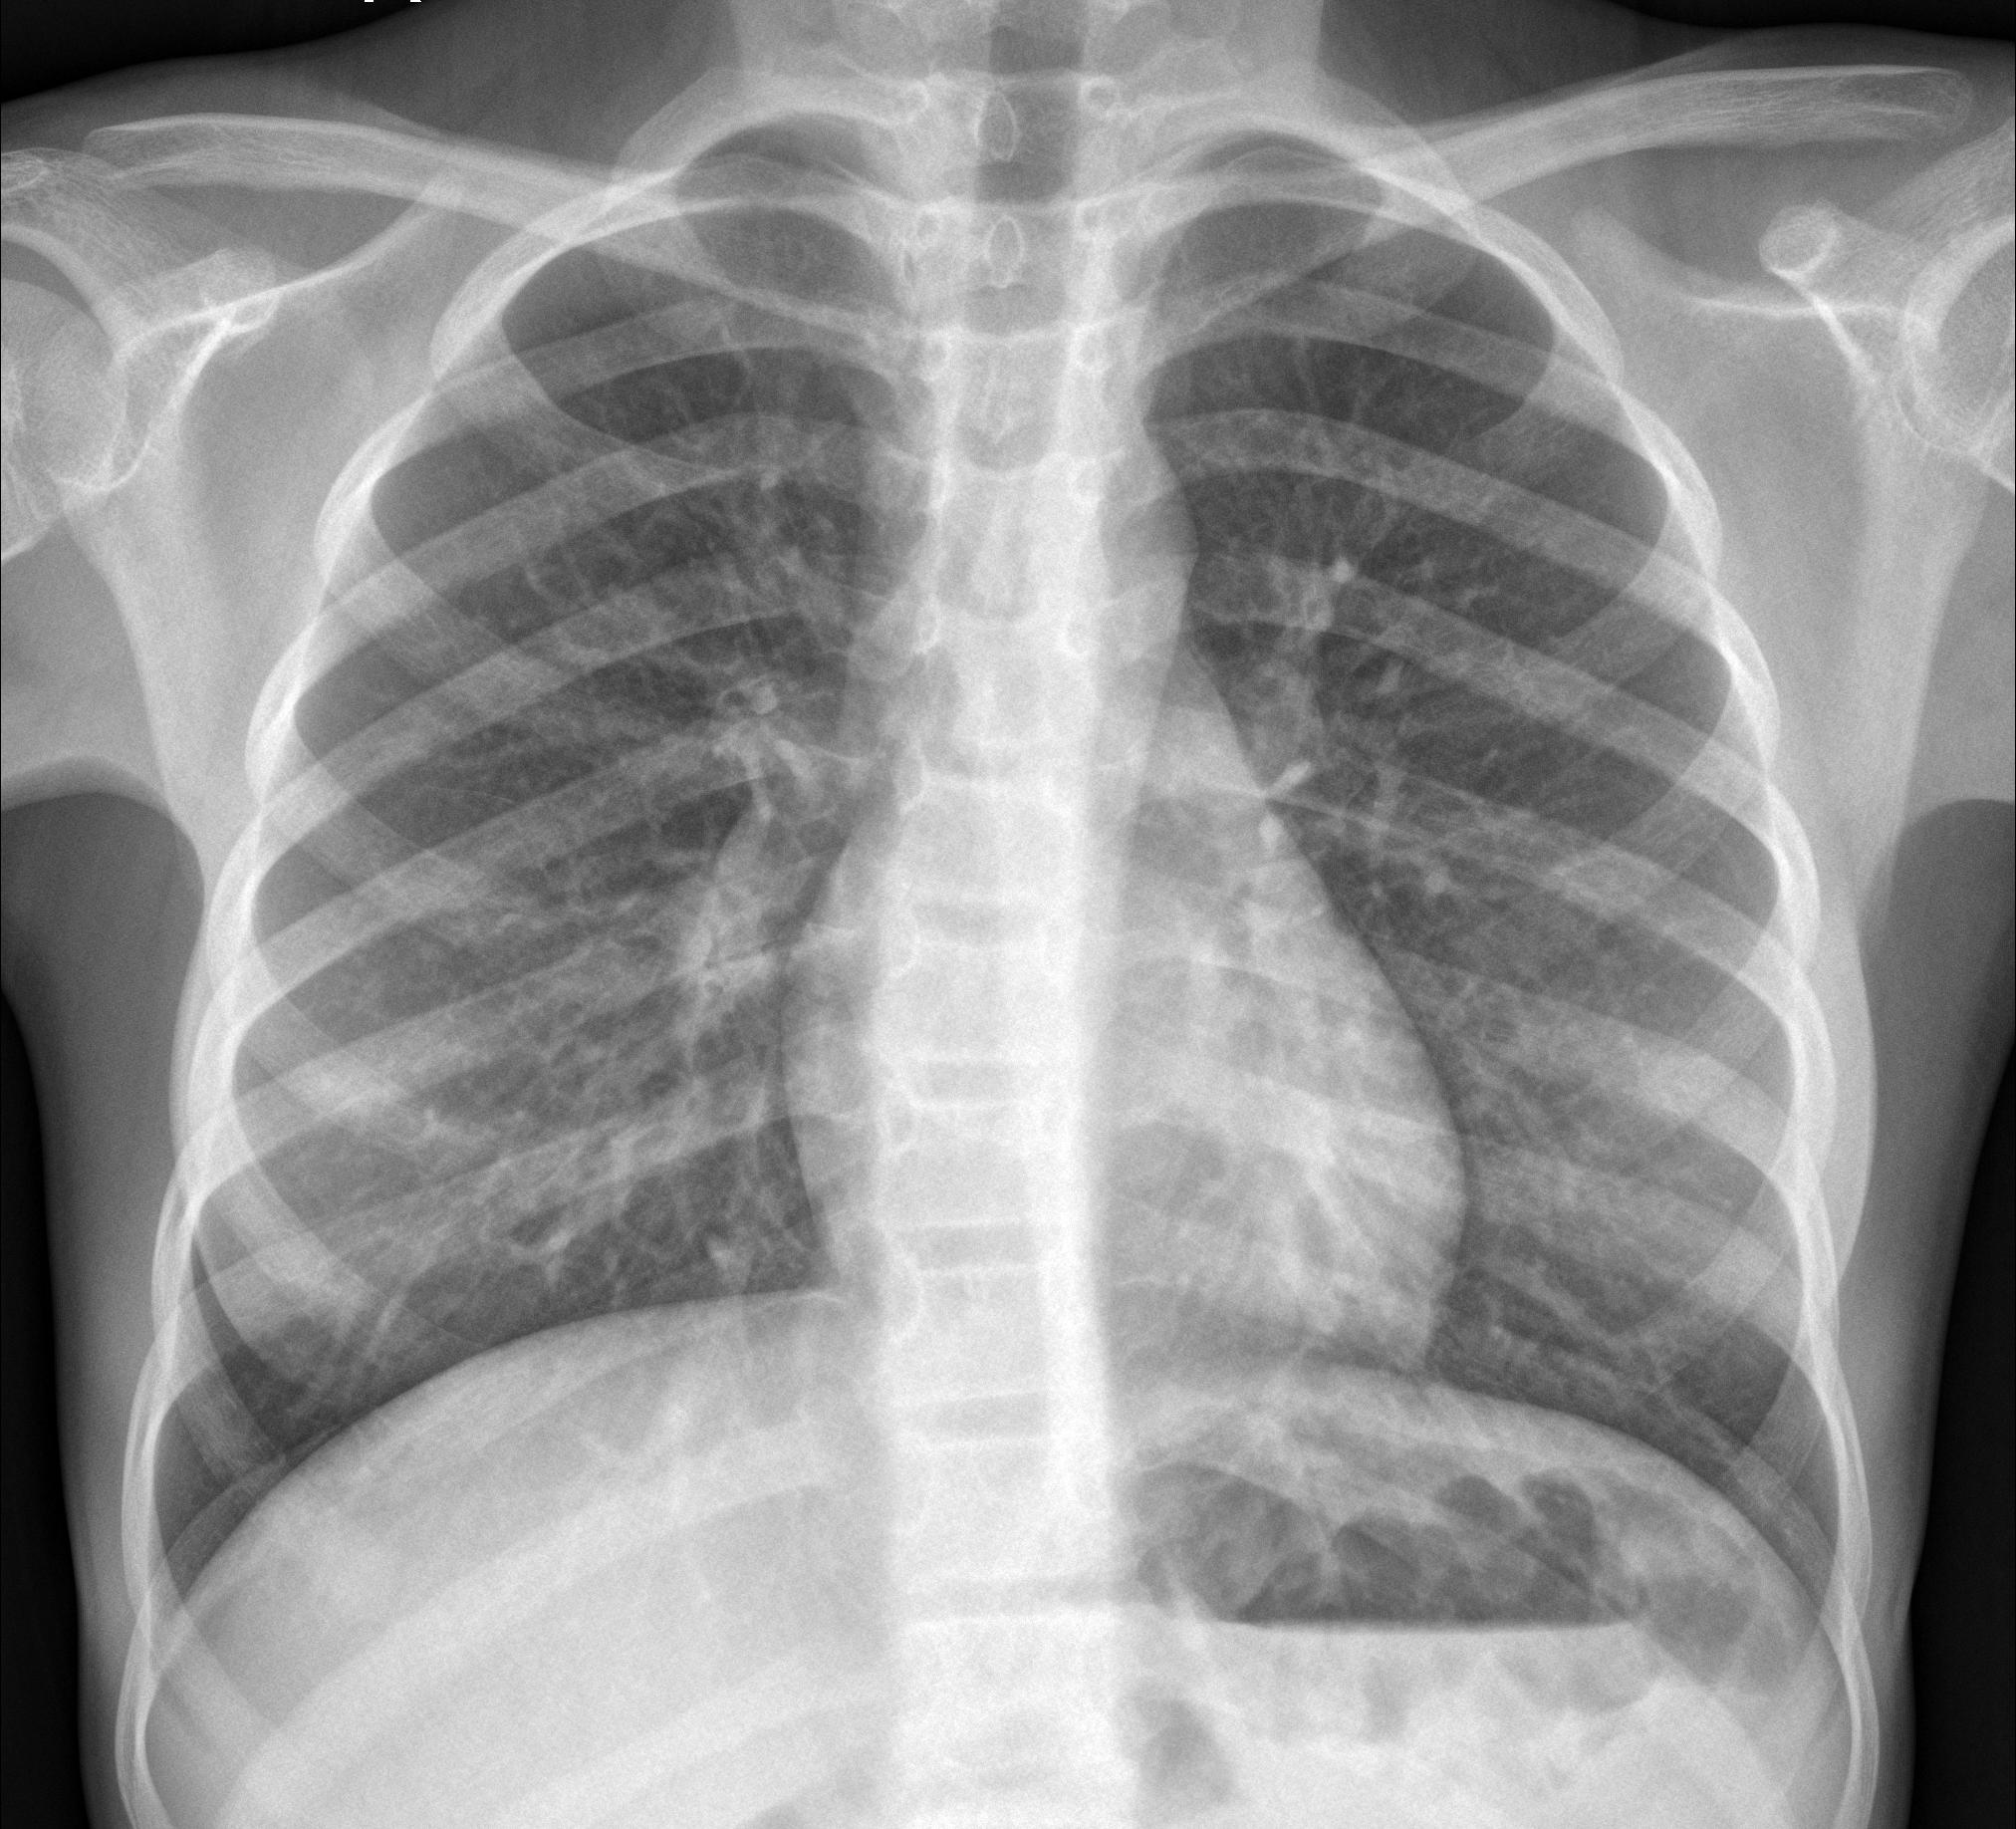

[[ 1 15 16 ... 14  9  2]
 [ 1 15 16 ... 14  9  2]
 [ 1 15 16 ... 14  9  2]
 ...
 [ 1  8 14 ... 19 17  1]
 [ 1  8 14 ... 19 17  1]
 [ 1  8 14 ... 19 17  1]]


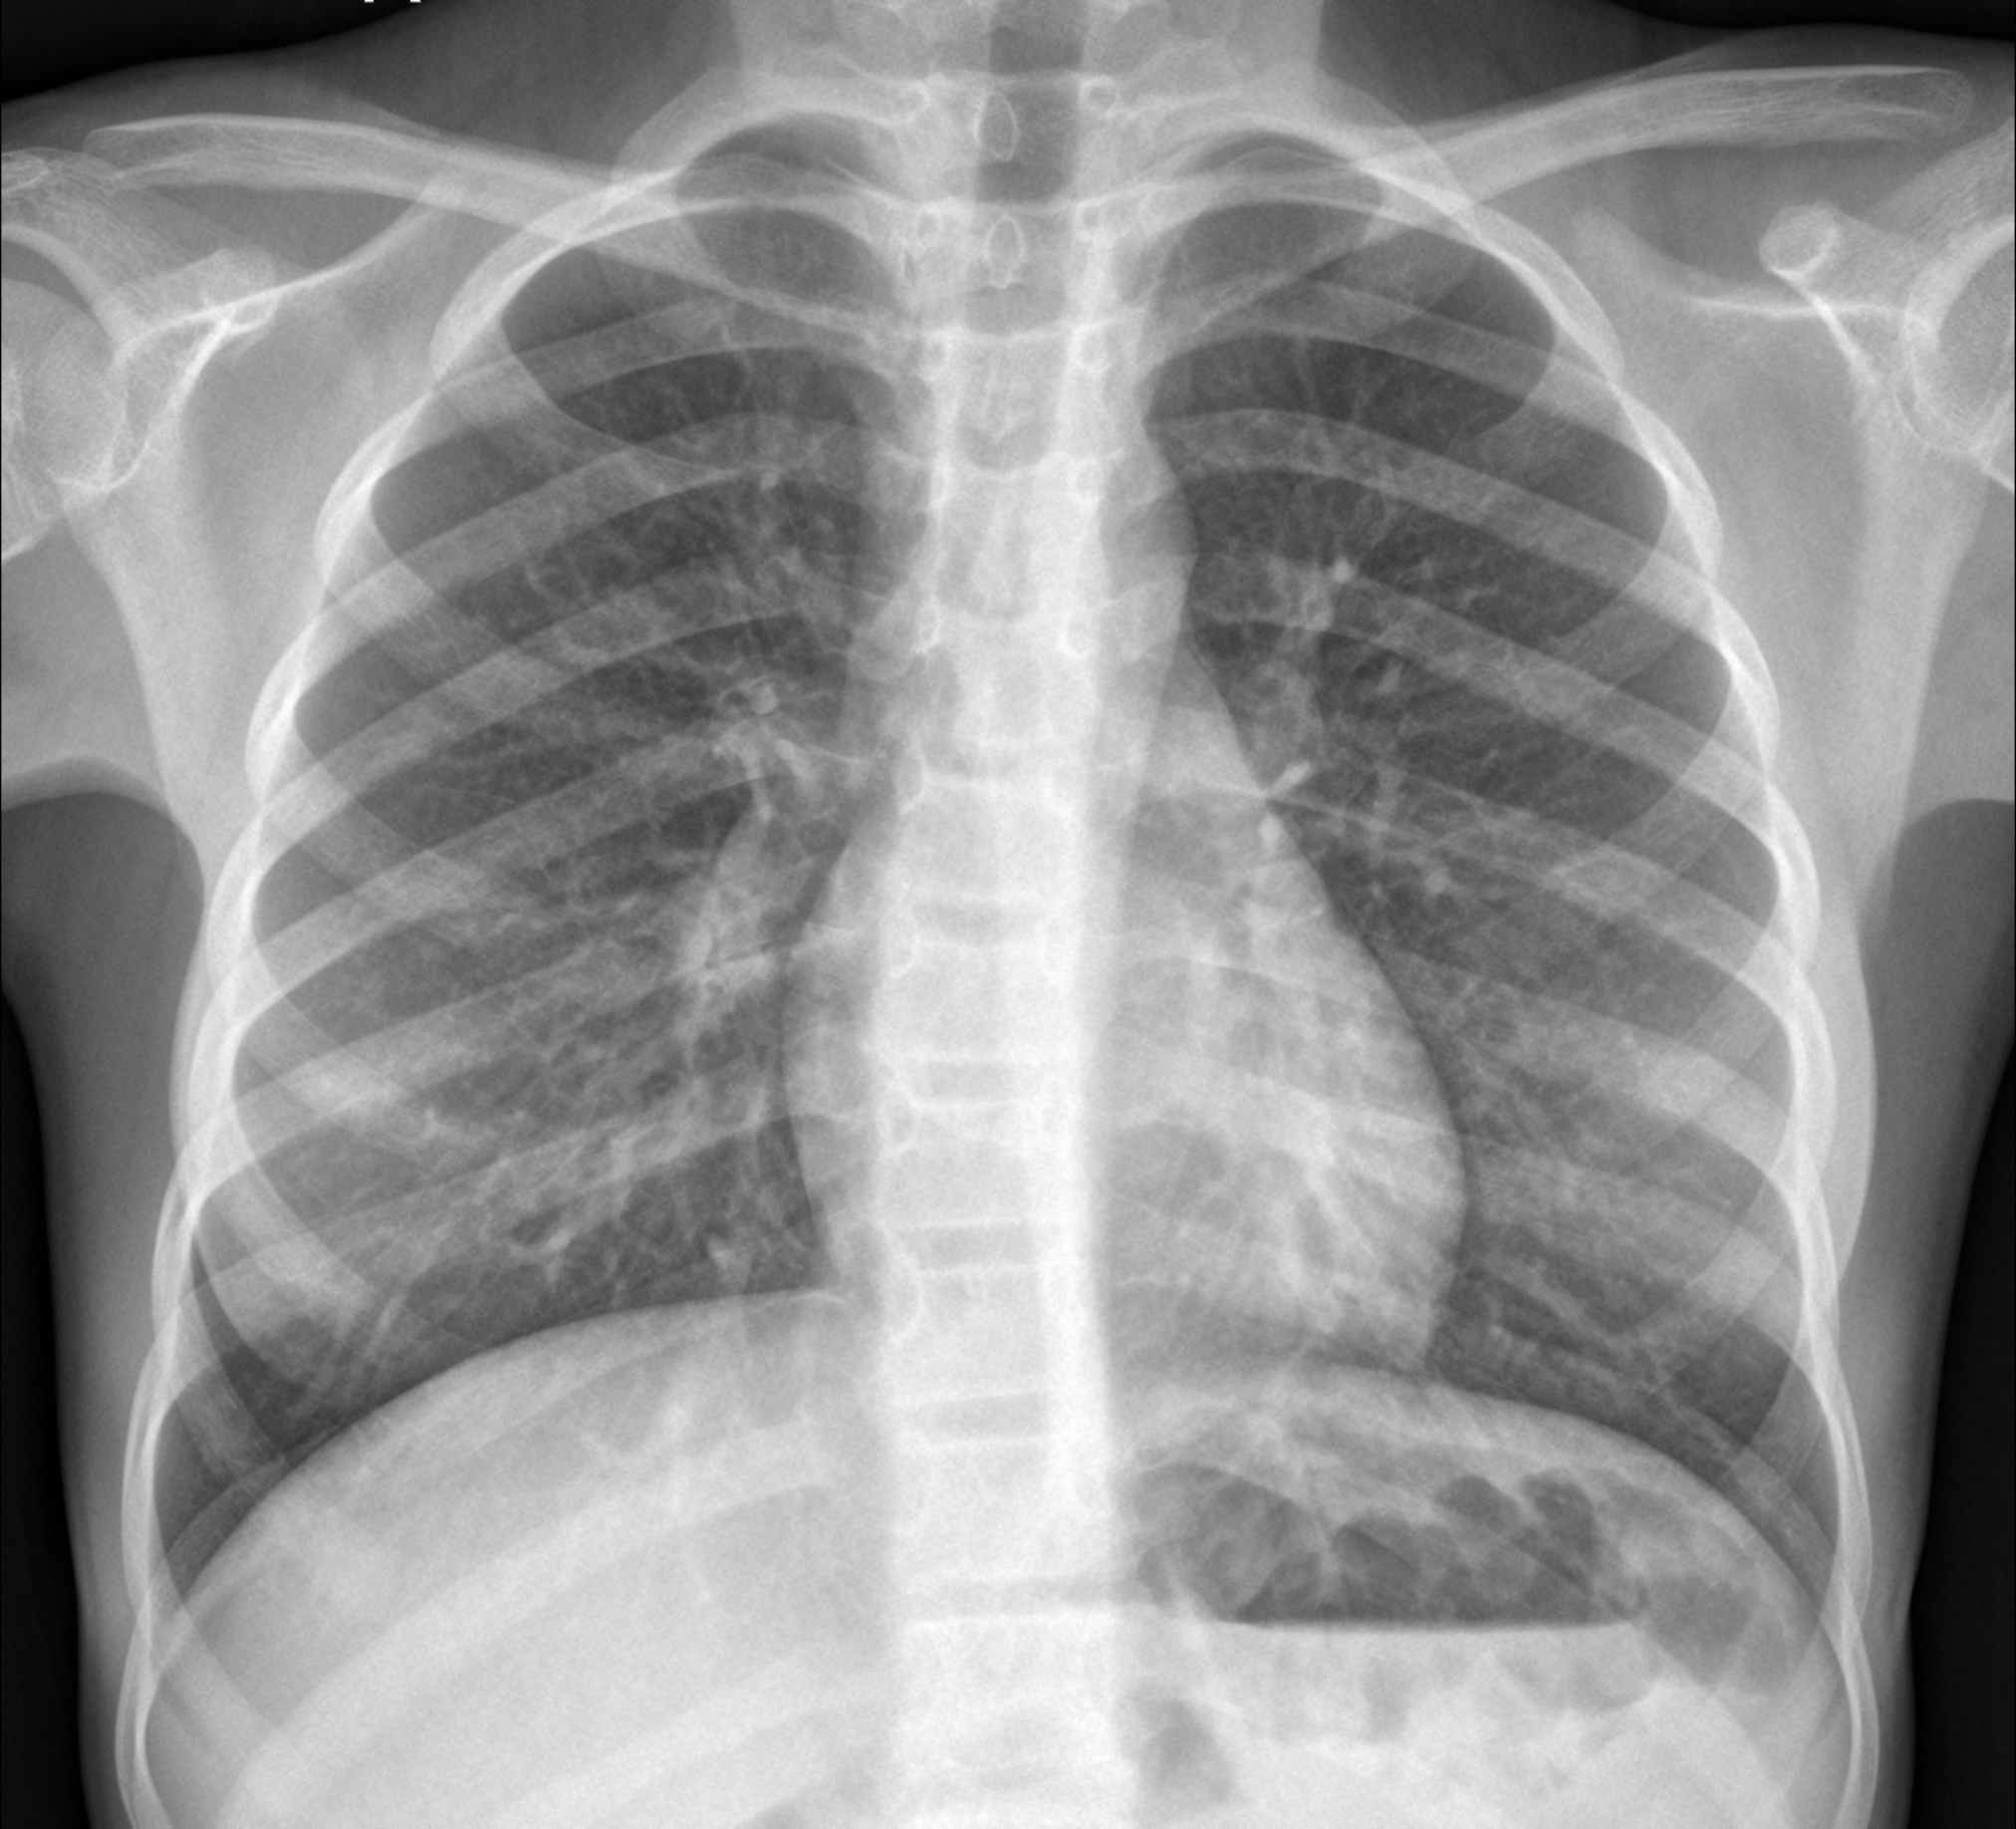

[[ 1 15 16 ... 14  9  2]
 [ 1 11 15 ... 12  8  2]
 [ 1 11 15 ... 12  8  2]
 ...
 [ 1  8 11 ... 16 12  1]
 [ 1  8 11 ... 16 12  1]
 [ 1  8 14 ... 19 17  1]]


In [ ]:

# Calculamos la media de la foto seleccionada.
# Para ello mostramos previamente la imagen seleccionada y su array de valores,
# posteriormente mostramos la imagen después de aplicar el filtro "media" y el array de valores que la representa la imagen.


imgpath = './dataset/output/test/normal/IM-0033-0001-0002.jpeg' #Especificamos la imagen a la que le aplicaremos el filtro.


img = Image.open(imgpath)
img = img.convert('L')
display(img)

imgmatrix = np.asarray(img, dtype=np.uint8)
print (imgmatrix)

kernelValues_media = [1/9 , 1/9 , 1/9 , 1/9 , 1/9 , 1/9 ,1/9 ,1/9 ,1/9 ] # Aplicamos el filtro "media" de tamaño 3x3.

kernel = ImageFilter.Kernel((3,3), kernelValues_media)
 
im2 = img.filter(kernel)
 
display(im2)
imgmatrix2 = np.asarray(im2, dtype=np.uint8)
print (imgmatrix2)



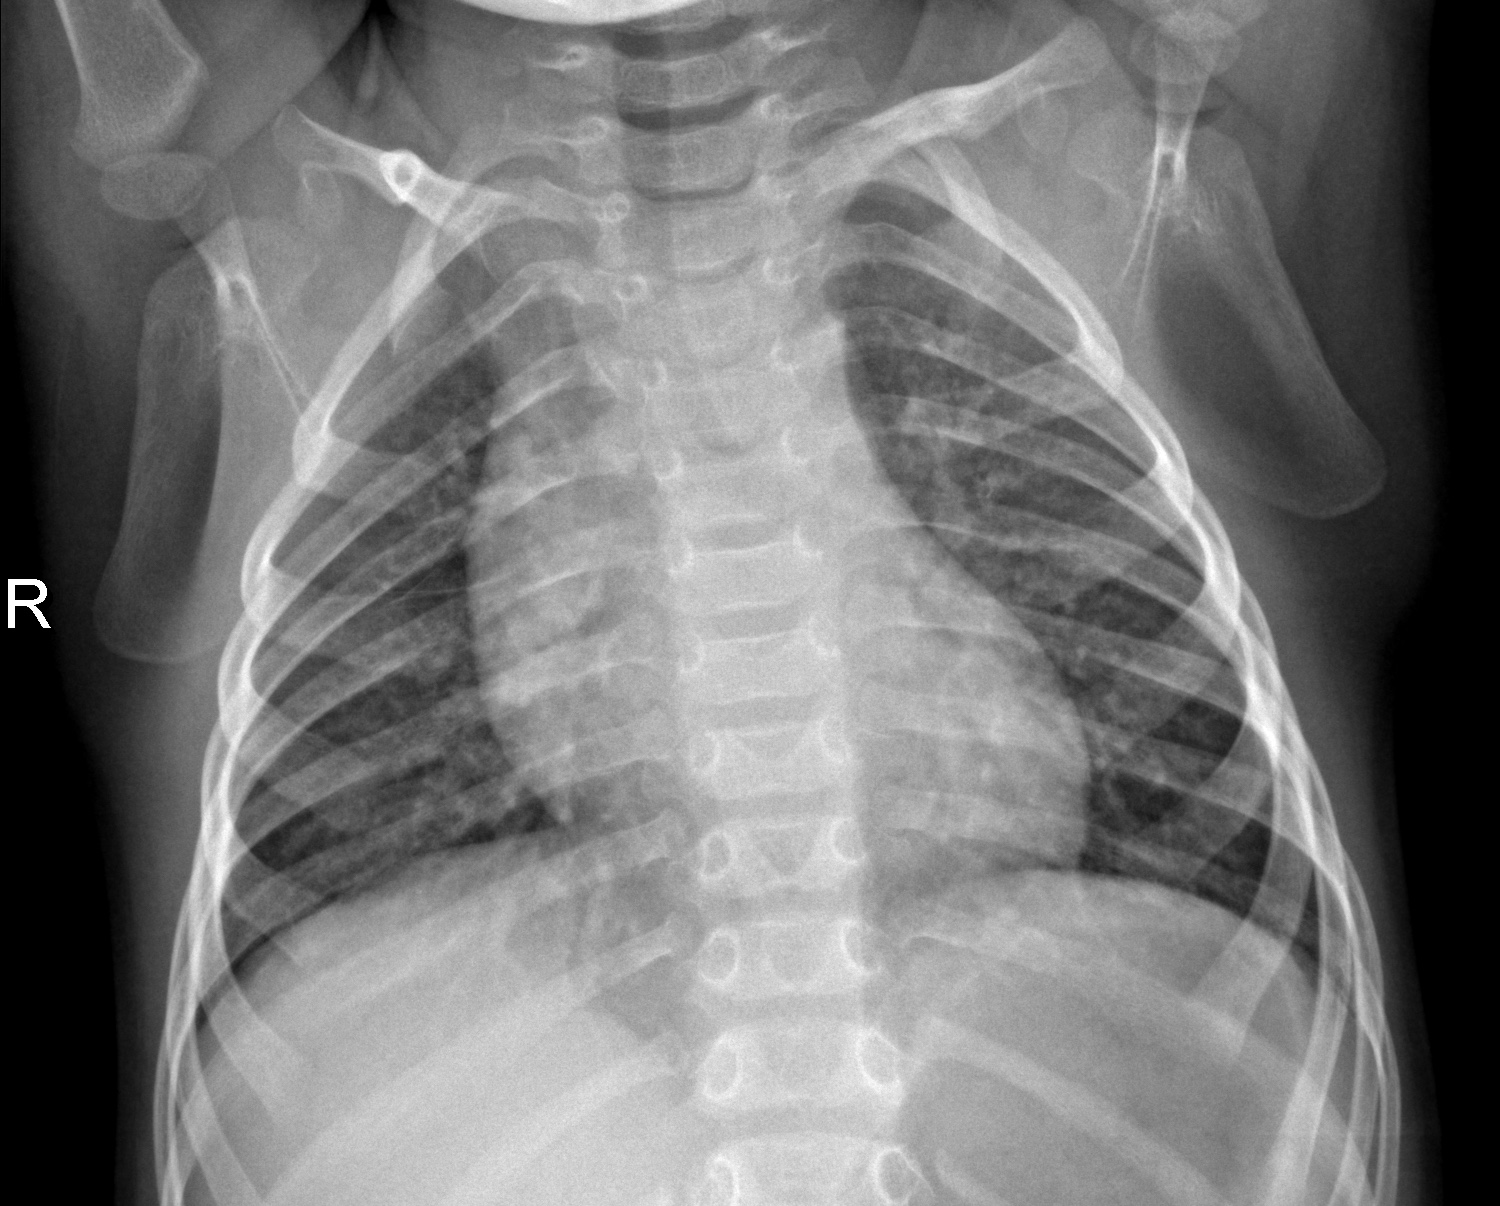

[[ 0 42 41 ...  0  0  0]
 [ 1 44 43 ...  0  0  0]
 [ 0 44 43 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


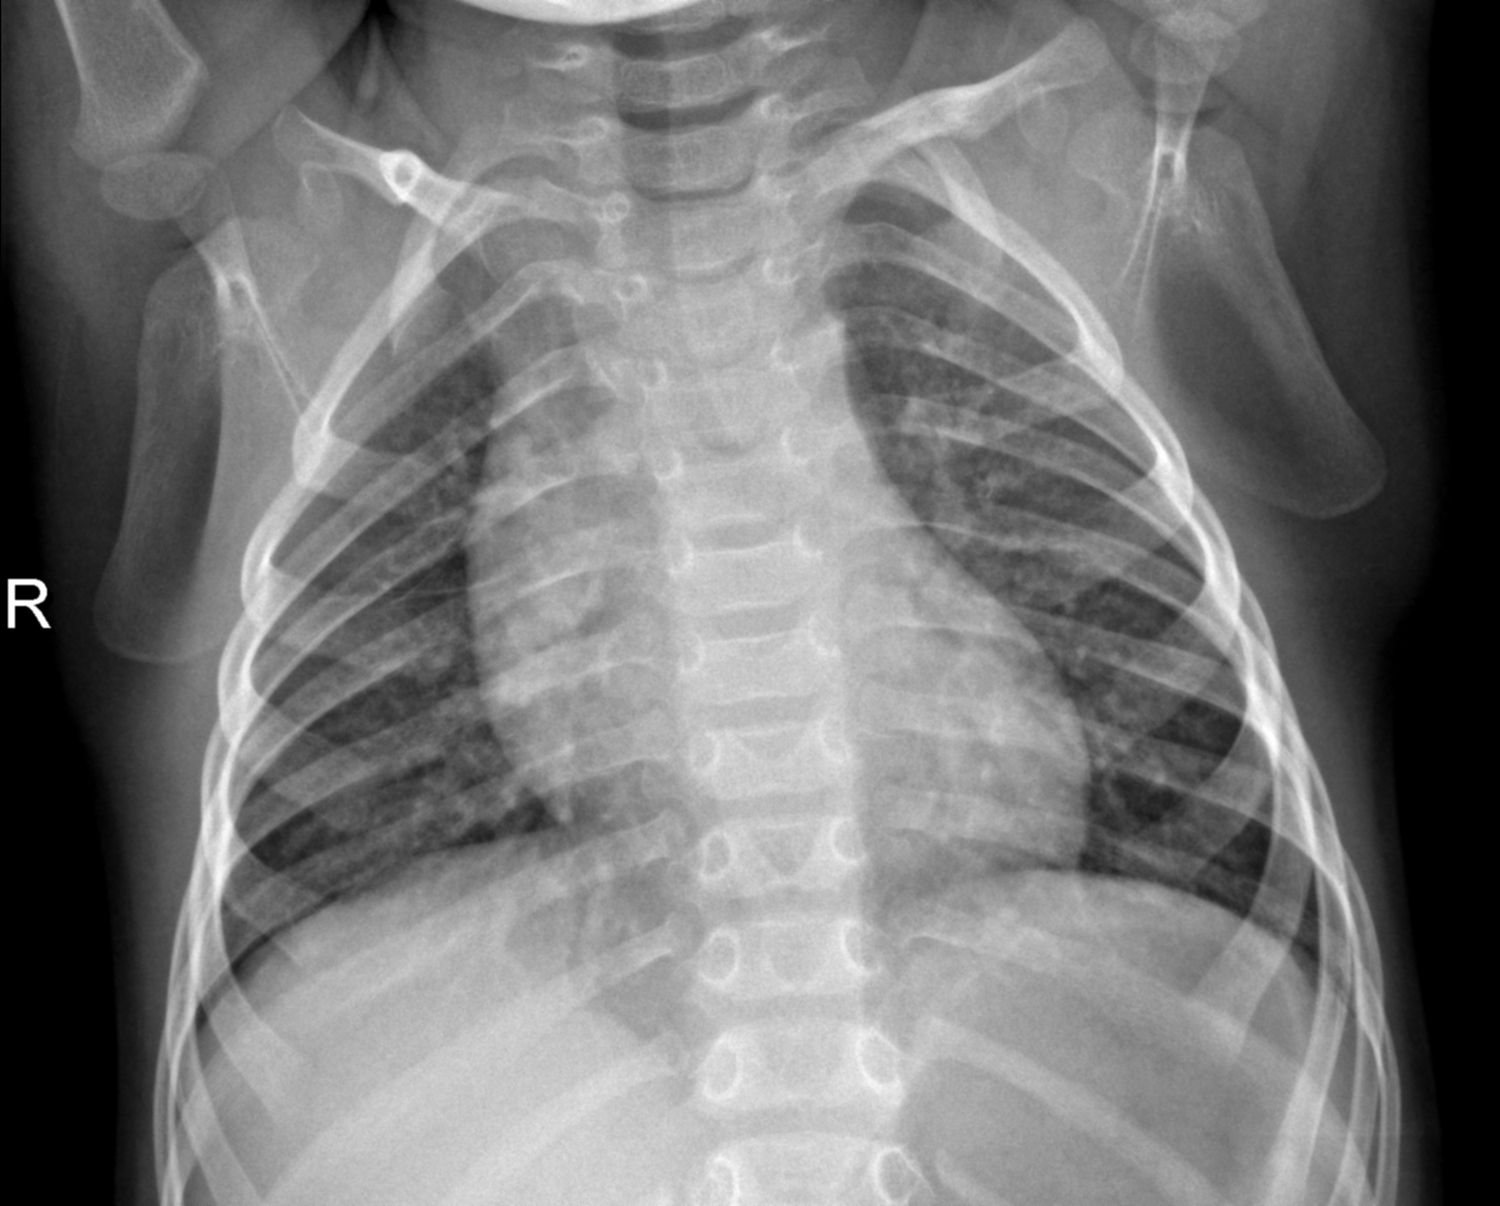

[[ 0 42 41 ...  0  0  0]
 [ 1 33 43 ...  0  0  0]
 [ 0 33 44 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [ ]:
# Calculamos la mediana de la foto seleccionada. 
#Para ello mostramos previamente la imagen seleccionada y su array de valores,
# posteriormente mostramos la imagen una vez aplicado el filtro "mediana" y el array de valores que la representa.


imgpath = './dataset/output/train/normal/NORMAL2-IM-1221-0001.jpeg'


img = Image.open(imgpath)
img = img.convert('L')
display(img)

imgmatrix = np.asarray(img, dtype=np.uint8)
print (imgmatrix)

kernelValues_mediana = [1 , 2 , 1, 2 , 4 , 2 ,1 ,2 ,1 ] #Aplicamos el filtro "mediana" de tamaño 3x3.

kernel = ImageFilter.Kernel((3,3), kernelValues_mediana)
 
im2 = img.filter(kernel)
 
display(im2)
imgmatrix2 = np.asarray(im2, dtype=np.uint8)
print (imgmatrix2)

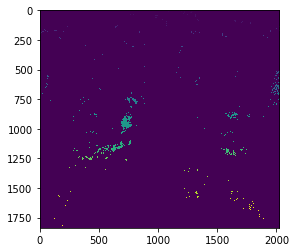

In [ ]:
# Mostramos aquellas zonas que destacan en la imagen.
#En particulamos mostramos aquellos píxeles que tienen un valor superior al de la media de la imagen.

im =  imgmatrix
mask = im > im.mean()

#Miramos las componenetes conexas de la imagen.
label_im, nb_labels = ndimage.label(mask)
nb_labels 
plt.imshow(label_im)        

# Calculamos eñ tamaño y valores medios.
sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
mean_vals = ndimage.sum(im, label_im, range(1, nb_labels + 1))

#Limpiamos aquellas pequeñas componenetes conexas.

mask_size = sizes < 1000
remove_pixel = mask_size[label_im]
remove_pixel.shape

#Reasignamos las etiquetas

labels = np.unique(label_im)
label_im = np.searchsorted(labels, label_im)


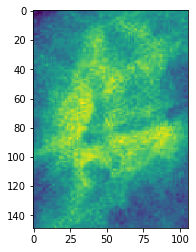

In [ ]:
#Encontramos la región de interés que encierra al objeto.

label_im[remove_pixel] = 0
plt.imshow(label_im)        

labels = np.unique(label_im)
label_im = np.searchsorted(labels, label_im)
slice_x, slice_y = ndimage.find_objects(label_im==4)[0]
roi = im[slice_x, slice_y]
plt.imshow(roi)  

In [ ]:
# Realizamos data augmentation sólo al data set de entrenamiento (procedimiento que permite aumentar el número de imágenes de entrenamiento, tomando otras del mismo conjunto y modificándolas como sigue) : 
#mediante el rescalado, rotación, modificación de largo y ancho de la imagen, zoom de ampliación y alejamiento, no aceptamos el giro de la imagen e indicamos que rellene los píxeles faltantes con los valores de los píxeles más cercanos al mismo.


train_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range = 10,
                              width_shift_range = 0.05,
                              height_shift_range =0.05,
                              zoom_range =0.2,
                              horizontal_flip =False,
                              fill_mode = 'nearest')
test_gen = ImageDataGenerator(rescale=1./255) #realizamos un escalado de los datos, de tal forma que el valor del pixel pasa de ser un número perteneciente al intervalo [0,255], a ser un valor comprendido entre 0 y 1.
                                              # En esta ocasión el escalado no influye en la mejora del algoritmo, tan solo es un cambio de escala realizado a todos los píxeles de todas las imagenes. Si suprimimos el código "rescale=1./255" evitaremos el escalado.


In [ ]:

SIZE = 150
EPOCHS = 60

BATCH_SIZE = 60 # elegimos el tamaño de los grupos que iremos tomando para entrenar la red neuronal.
train_dir = './dataset/output/train'
train_generator = train_gen.flow_from_directory(train_dir, 
                  target_size=(SIZE,SIZE), batch_size = BATCH_SIZE,
                  shuffle=True,seed =42, subset='training', class_mode='categorical')

test_dir = './dataset/output/test'
test_generator = test_gen.flow_from_directory(test_dir, 
                 target_size=(SIZE,SIZE), batch_size = BATCH_SIZE,
                 shuffle=True, seed =42, class_mode='categorical')

#Dividimos el dataset de train y test
X_train, y_train = train_generator.next()
X_test, y_test = test_generator.next()



Found 4684 images belonging to 3 classes.
Found 1172 images belonging to 3 classes.


### DISEÑAMOS EL ALGORITMO

In [ ]:


ImageFile.LOAD_TRUNCATED_IMAGES = True

SIZE = 150
EPOCHS = 60 # Fijamos el número de iteraciones que realizará el algoritmo.

# Diseñamos la topología del algoritmo:

model = Sequential() # definimos el modelo secuencial
model.add(Conv2D(16, (3,3), activation='relu',input_shape=(SIZE,SIZE,3))) # Añadimos una capa convolucional e indicamos como función de activación relu.
model.add(Dropout(0.5)) # Añadimos una capa de Dropout para eliminar el sobreaprendizaje (overfitting).
model.add(MaxPooling2D((2,2)))# Añadimos una capa de MaxPooling que toma el mayor valor representativo de cada conjunto de píxeles.
         
model.add(Conv2D(20, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2))) 
          
model.add(Conv2D(50, (3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))         
          
model.add(Flatten()) # Realizamos un flatten para poder hacer uso de las redes neuronales densas.
model.add(Dense(20,activation='relu'))
model.add(Dense(3,activation='sigmoid')) # Indicamos tres neuronas de salida debido a que tenemos tres categorías.

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])# indicamos que es una entropía categórica( y no binaria) y seleccionamos el optimizador y la métrica de error ( en este caso accuracy= precisión).
model.summary()

BATCH_SIZE = 60 # elegimos el tamaño de los grupos que iremos tomando para entrenar la red neuronal.
train_dir = './dataset/output/train'
train_generator = train_gen.flow_from_directory(train_dir, 
                  target_size=(SIZE,SIZE), batch_size = BATCH_SIZE,
                  shuffle=True,seed =42, class_mode='categorical')

test_dir = './dataset/output/test'
test_generator = test_gen.flow_from_directory(test_dir, 
                 target_size=(SIZE,SIZE), batch_size = BATCH_SIZE,
                 shuffle=True,seed =42, class_mode='categorical')

history = model.fit_generator(train_generator, 
                 steps_per_epoch = 800//BATCH_SIZE, 
                 epochs = EPOCHS,
                 validation_data = test_generator,
                 validation_steps = 200//BATCH_SIZE, verbose = 1) # Con verbose = 1 podemos imprimir en pantalla los resultados obtenidos en cada epoch al mismo tiempo que se entrena el algoritmo.


                                                                 

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 148, 148, 16)      448       
_________________________________________________________________
dropout_103 (Dropout)        (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 72, 72, 20)        2900      
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 36, 36, 20)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 34, 34, 50)        9050      
_________________________________________________________________
dropout_104 (Dropout)        (None, 34, 34, 50)      

Epoch 46/60
13/13 [==============================] - 27s 2s/step - loss: 0.7121 - accuracy: 0.7308 - val_loss: 0.6935 - val_accuracy: 0.7444
Epoch 47/60
13/13 [==============================] - 26s 2s/step - loss: 0.7179 - accuracy: 0.7449 - val_loss: 0.7198 - val_accuracy: 0.7566
Epoch 48/60
13/13 [==============================] - 25s 2s/step - loss: 0.6917 - accuracy: 0.7410 - val_loss: 0.6995 - val_accuracy: 0.8111
Epoch 49/60
13/13 [==============================] - 25s 2s/step - loss: 0.6796 - accuracy: 0.7397 - val_loss: 0.7477 - val_accuracy: 0.7611
Epoch 50/60
13/13 [==============================] - 23s 2s/step - loss: 0.6797 - accuracy: 0.7459 - val_loss: 0.6512 - val_accuracy: 0.7944
Epoch 51/60
13/13 [==============================] - 25s 2s/step - loss: 0.6973 - accuracy: 0.7487 - val_loss: 0.6954 - val_accuracy: 0.7056
Epoch 52/60
13/13 [==============================] - 28s 2s/step - loss: 0.7076 - accuracy: 0.7397 - val_loss: 0.6117 - val_accuracy: 0.7889
Epoch 53/60
1

Respecto a la métrica de bondad de ajuste  elegida, he usado accuracy debido a que muestra la precisión de mi algoritmo.

En la anterior ejecución tras una modificación progresiva, en función de los valores obtenidos, del número de neuronas, dropouts, epochs y batch_size hemos conseguido llegar a un valor máximo de accuracy de 0.8889

Dado que estamos en una clasificación, podríamos haber usado cualquiera de las siguientes métricas (indicando la métrica a la hora de compilar el algoritmo: metrics=['']):
    
Las posibles métricas de bondad de ajuste son: ‘accuracy’,‘balanced_accuracy’,‘top_k_accuracy’,‘average_precision’,‘neg_brier_score’,‘f1’,‘f1_micro’,‘f1_macro’,
‘f1_weighted’,‘f1_samples’,‘neg_log_loss’,‘precision’ ,‘recall’,‘jaccard’,‘roc_auc’,‘roc_auc_ovr’,‘roc_auc_ovo’,‘roc_auc_ovr_weighted’ y ‘roc_auc_ovo_weighted’.

Hemos usado la función de coste : loss='categorical_crossentropy'. 

Era necesario hacer uso de la misma debido a que tenemos una clasificación con tres categorías.
    
En el caso de haber tenido una clasificación binaria, deberíamos haber hecho uso de la función: loss= 'binary_crossentropy'.

In [ ]:
# Definimos las siguientes dos gráficas:

def plot(h):
    LOSS = 0; ACCURACY=1
    training= np.zeros((2,EPOCHS)); testing= np.zeros((2, EPOCHS))
    training[LOSS]= h.history['loss']
    testing[LOSS]= h.history['val_loss']

    training[ACCURACY]= h.history['accuracy']
    testing[ACCURACY]= h.history['val_accuracy']

    epochs= range(1, EPOCHS+1)
    fig, axs = plt.subplots(1, 2, figsize=(17,5))
    for i, label in zip((LOSS, ACCURACY), ('loss', 'accuracy')):
      axs[i].plot(epochs, training[i], 'b-', label='Training ' + label)
      axs[i].plot(epochs, testing[i], 'y-', label='Test ' + label)
      axs[i].set_title('Training and Test '+ label)
      axs[i].set_xlabel('Epochs')
      axs[i].set_ylabel(label)
      axs[i].legend()
    plt.show()
    
    
    

Pintamos en pantalla dos gráficas:

    -La primera muestra el error cometido en el dataset de train y en el data set de testeo.
     Un buen indicativo para observar si hay overfitting es:  si la línea de pérdida de train se encuentra en gran parte de los epochs por debajo de la línea de pérdida de test.
    
    -En la segunda gráfica observamos el valor de accuracy. Gracias a ella podemos observar si la tendencia es                      ascendente (lo que sería un buen indicativo para aumentar el número de epochs).
     En el caso de que la línea azul sobrepase la línea amarilla sería indicativo de overfitting, debido a que la linea de          aprendizaje del conjunto de training evoluciona mejor que la línea de aprendizaje del conjunto de test. Una posible            mejora para evitar overfitting sería añadiendo/aumentando el dropout.
     Otra forma sería aumentar en la manera de lo posible el dataset y aplicar data augmentation.

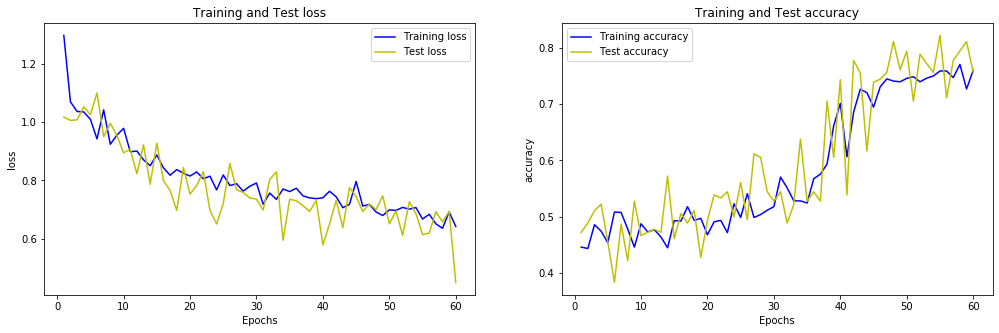

In [ ]:
plot(history) 


Observamos que gracias a la regularización aplicada (las capas de dropout), podemos decir que no existe sobreajuste en el modelo ya que la línea amarilla en la gráfica "accuraccy" se encuentra ( en la mayoría de los epochs) por encima de la línea azul.

In [ ]:
# Mediante este código obtenemos los parámetros obtenidos en a primera capa, que en este caso son los arrays valores de los pesos (w_ij) obtenidos en cada epoch gracias al aprendizaje del algoritmo.

model.layers[0].get_weights()

[array([[[[-4.67880704e-02,  1.41393417e-03, -2.38887250e-01,
            5.06032072e-02, -3.38025391e-02,  1.55744001e-01,
           -1.47176281e-01, -1.39810070e-02, -2.27820158e-01,
            1.22148156e-01, -6.09074347e-02,  1.61404341e-01,
           -4.95414697e-02,  1.02961045e-02, -2.93001998e-02,
           -1.03437304e-01],
          [-2.33093590e-01, -1.73000097e-02, -2.27788866e-01,
            6.75603673e-02, -3.20387930e-02,  1.49160698e-01,
            8.97800997e-02, -2.74823681e-02, -1.57574981e-01,
           -8.63002706e-03, -2.04455797e-02,  4.04575095e-02,
           -1.41086727e-02,  1.17655784e-01, -4.45380583e-02,
            1.23068988e-01],
          [ 5.32765202e-02, -1.41921908e-01, -1.61674082e-01,
            7.00789616e-02, -4.54264134e-02, -1.11676484e-01,
            2.29691006e-02,  5.85992634e-02, -2.36847196e-02,
           -1.10864207e-01, -1.13474159e-02,  3.19539644e-02,
            1.11468323e-01,  1.11065686e-01, -9.97507796e-02,
            

### OPTIMIZACIÓN DE HIPERPARÁMETROS

In [ ]:
#Dividimos el dataset de train y test
X_train, y_train = train_generator.next()
X_test, y_test = test_generator.next()



In [ ]:
#Definimos el modelo base, en este caso personalizando el optimizador y añadiendo capas a la red

def create_baseline(optimizer, learn_rate ):
    print("optimizer, learn_rate, b_1, b_2, epsil", optimizer, learn_rate)
    if (optimizer == 'Adam'): 
        opt = tf.keras.optimizers.Adam( learning_rate=learn_rate,
                                        amsgrad=False, name=optimizer )
    elif (optimizer == 'Nadam'):     
        opt = tf.keras.optimizers.Nadam(learning_rate=learn_rate,
                                        name=optimizer)
    elif (optimizer == 'Adamax'): 
        opt = tf.keras.optimizers.Adamax(learning_rate=learn_rate, 
                                         name=optimizer)
        
    model = Sequential() # definimos el modelo secuencial
    model.add(Conv2D(16, (3,3), activation='relu',input_shape=(SIZE,SIZE,3))) # Añadimos una capa convolucional e indicamos como función de activación relu.
    model.add(Dropout(0.5)) # Añadimos una capa de Dropout para eliminar el sobreaprendizaje (overfitting).
    model.add(MaxPooling2D((2,2)))# Añadimos una capa de MaxPooling que toma el mayor valor representativo de cada conjunto de píxeles.
         
    model.add(Conv2D(20, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2))) 
          
    model.add(Conv2D(50, (3,3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2,2)))         
          
    model.add(Flatten()) # Realizamos un flatten para poder hacer uso de las redes neuronales densas.
    model.add(Dense(20,activation='relu'))
    model.add(Dense(3,activation='sigmoid')) # Indicamos tres neuronas de salida debido a que tenemos tres categorías.

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Compilamos el modelo.
    
    return model


In [ ]:

stimtrs = []
stimtrs.append(('mlp', tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_baseline, 
                                                                      learn_rate=0.00084,     
                                                                      epochs = 110, 
                                                                      batch_size=16, 
                                                                      verbose=1)))
pipeline = Pipeline(stimtrs)



In [ ]:
#Buscamos el mejor modelo 

param_grid = {
    'mlp__epochs': [20, 30],
    'mlp__batch_size':[16, 32],
    'mlp__optimizer': ['Adam', 'Nadam'],
    'mlp__learn_rate': [0.00081, 0.00085] 
   
}
scoring_refit = 'accuracy'    
grid = GridSearchCV(pipeline, param_grid=param_grid, verbose=1, refit= scoring_refit) 
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    
    

Fitting 5 folds for each of 16 candidates, totalling 80 fits
optimizer, learn_rate, b_1, b_2, epsil Adam 0.00081


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/20
48/48 [==============================] - 2s 42ms/step - loss: 1.3556 - accuracy: 0.3750
Epoch 2/20
48/48 [==============================] - 1s 30ms/step - loss: 1.0302 - accuracy: 0.4792
Epoch 3/20
48/48 [==============================] - 1s 31ms/step - loss: 1.0446 - accuracy: 0.4792
Epoch 4/20
48/48 [==============================] - 1s 30ms/step - loss: 1.0309 - accuracy: 0.4792
Epoch 5/20
48/48 [==============================] - 2s 31ms/step - loss: 0.9768 - accuracy: 0.4792
Epoch 6/20
48/48 [==============================] - 1s 30ms/step - loss: 0.9477 - accuracy: 0.4792
Epoch 7/20
48/48 [==============================] - 1s 30ms/step - loss: 1.0327 - accuracy: 0.4792
Epoch 8/20
48/48 [==============================] - 1s 29ms/step - loss: 0.9412 - accuracy: 0.4792
Epoch 9/20
48/48 [==============================] - 2s 31ms/step - loss: 0.9004 - accuracy: 0.4792
Epoch 10/20
48/48 [==============================] - 1s 31ms/step - loss: 0.9044 - accuracy: 0.4792
Epoch 11/

12/12 [==============================] - 1s 42ms/step
optimizer, learn_rate, b_1, b_2, epsil Adam 0.00081
Epoch 1/20
48/48 [==============================] - 2s 43ms/step - loss: 1.4141 - accuracy: 0.4792
Epoch 2/20
48/48 [==============================] - 1s 30ms/step - loss: 1.0740 - accuracy: 0.4792
Epoch 3/20
48/48 [==============================] - 1s 30ms/step - loss: 1.0006 - accuracy: 0.5000
Epoch 4/20
48/48 [==============================] - 1s 30ms/step - loss: 1.0090 - accuracy: 0.5000
Epoch 5/20
48/48 [==============================] - 1s 31ms/step - loss: 0.9281 - accuracy: 0.5000
Epoch 6/20
48/48 [==============================] - 2s 34ms/step - loss: 0.9837 - accuracy: 0.5000
Epoch 7/20
48/48 [==============================] - 2s 34ms/step - loss: 0.9451 - accuracy: 0.5000
Epoch 8/20
48/48 [==============================] - 2s 37ms/step - loss: 0.8618 - accuracy: 0.5000
Epoch 9/20
48/48 [==============================] - 2s 34ms/step - loss: 0.8145 - accuracy: 0.5833
Epo

48/48 [==============================] - 2s 37ms/step - loss: 0.6759 - accuracy: 0.7083
Epoch 19/20
48/48 [==============================] - 2s 37ms/step - loss: 0.4961 - accuracy: 0.8333
Epoch 20/20
12/12 [==============================] - 1s 52ms/step
optimizer, learn_rate, b_1, b_2, epsil Nadam 0.00081
Epoch 1/20
48/48 [==============================] - 3s 53ms/step - loss: 1.2921 - accuracy: 0.3333
Epoch 2/20
48/48 [==============================] - 2s 36ms/step - loss: 1.1013 - accuracy: 0.5000
Epoch 3/20
48/48 [==============================] - 2s 35ms/step - loss: 1.0838 - accuracy: 0.5000
Epoch 4/20
48/48 [==============================] - 2s 39ms/step - loss: 1.0820 - accuracy: 0.5000
Epoch 5/20
48/48 [==============================] - 2s 36ms/step - loss: 1.0691 - accuracy: 0.5000
Epoch 6/20
48/48 [==============================] - 2s 35ms/step - loss: 1.0573 - accuracy: 0.5000
Epoch 7/20
48/48 [==============================] - 2s 35ms/step - loss: 1.0540 - accuracy: 0.5000


48/48 [==============================] - 2s 33ms/step - loss: 0.4409 - accuracy: 0.8125
Epoch 17/20
48/48 [==============================] - 2s 37ms/step - loss: 0.6655 - accuracy: 0.7917
Epoch 18/20
48/48 [==============================] - 2s 33ms/step - loss: 0.3630 - accuracy: 0.8542
Epoch 19/20
48/48 [==============================] - 2s 33ms/step - loss: 0.3631 - accuracy: 0.9167
Epoch 20/20
12/12 [==============================] - 1s 53ms/step
optimizer, learn_rate, b_1, b_2, epsil Adam 0.00085
Epoch 1/20
48/48 [==============================] - 3s 63ms/step - loss: 1.7048 - accuracy: 0.3542
Epoch 2/20
48/48 [==============================] - 2s 43ms/step - loss: 0.9980 - accuracy: 0.4583
Epoch 3/20
48/48 [==============================] - 2s 37ms/step - loss: 0.9698 - accuracy: 0.4583
Epoch 4/20
48/48 [==============================] - 2s 41ms/step - loss: 0.9711 - accuracy: 0.5208
Epoch 5/20
48/48 [==============================] - 2s 38ms/step - loss: 1.0432 - accuracy: 0.4792

48/48 [==============================] - 2s 35ms/step - loss: 0.7432 - accuracy: 0.4792
Epoch 15/20
48/48 [==============================] - 2s 34ms/step - loss: 0.6666 - accuracy: 0.4792
Epoch 16/20
48/48 [==============================] - 2s 33ms/step - loss: 0.6511 - accuracy: 0.4792
Epoch 17/20
48/48 [==============================] - 2s 37ms/step - loss: 0.5661 - accuracy: 0.4792
Epoch 18/20
48/48 [==============================] - 2s 35ms/step - loss: 0.6424 - accuracy: 0.4792
Epoch 19/20
48/48 [==============================] - 2s 39ms/step - loss: 0.6406 - accuracy: 0.4792
Epoch 20/20
12/12 [==============================] - 1s 61ms/step
optimizer, learn_rate, b_1, b_2, epsil Nadam 0.00085
Epoch 1/20
48/48 [==============================] - 3s 52ms/step - loss: 2.6231 - accuracy: 0.3750
Epoch 2/20
48/48 [==============================] - 2s 36ms/step - loss: 1.1124 - accuracy: 0.2083
Epoch 3/20
48/48 [==============================] - 2s 42ms/step - loss: 1.1039 - accuracy: 0.2

48/48 [==============================] - 2s 36ms/step - loss: 0.8178 - accuracy: 0.6458
Epoch 13/20
48/48 [==============================] - 2s 35ms/step - loss: 0.6584 - accuracy: 0.6458
Epoch 14/20
48/48 [==============================] - 2s 37ms/step - loss: 0.7963 - accuracy: 0.5000
Epoch 15/20
48/48 [==============================] - 2s 35ms/step - loss: 0.6984 - accuracy: 0.6667
Epoch 16/20
48/48 [==============================] - 2s 34ms/step - loss: 0.6043 - accuracy: 0.6667
Epoch 17/20
48/48 [==============================] - 2s 35ms/step - loss: 0.6227 - accuracy: 0.6042
Epoch 18/20
48/48 [==============================] - 2s 34ms/step - loss: 1.0476 - accuracy: 0.6042
Epoch 19/20
48/48 [==============================] - 2s 38ms/step - loss: 0.5725 - accuracy: 0.6042
Epoch 20/20
12/12 [==============================] - 1s 52ms/step
optimizer, learn_rate, b_1, b_2, epsil Adam 0.00081
Epoch 1/30
48/48 [==============================] - 2s 45ms/step - loss: 3.3291 - accuracy: 0.

48/48 [==============================] - 2s 33ms/step - loss: 0.7639 - accuracy: 0.7083
Epoch 12/30
48/48 [==============================] - 2s 33ms/step - loss: 0.7543 - accuracy: 0.6875
Epoch 13/30
48/48 [==============================] - 2s 34ms/step - loss: 0.7427 - accuracy: 0.7500
Epoch 14/30
48/48 [==============================] - 2s 34ms/step - loss: 0.8013 - accuracy: 0.6458
Epoch 15/30
48/48 [==============================] - 2s 33ms/step - loss: 0.5712 - accuracy: 0.8333
Epoch 16/30
48/48 [==============================] - 2s 37ms/step - loss: 0.7582 - accuracy: 0.7292
Epoch 17/30
48/48 [==============================] - 2s 32ms/step - loss: 0.5679 - accuracy: 0.8750
Epoch 18/30
48/48 [==============================] - 2s 32ms/step - loss: 0.3982 - accuracy: 0.8750
Epoch 19/30
48/48 [==============================] - 2s 33ms/step - loss: 0.4466 - accuracy: 0.7917
Epoch 20/30
48/48 [==============================] - 2s 32ms/step - loss: 0.4218 - accuracy: 0.7917
Epoch 21/30


optimizer, learn_rate, b_1, b_2, epsil Nadam 0.00081
Epoch 1/30
48/48 [==============================] - 2s 51ms/step - loss: 2.0050 - accuracy: 0.5208
Epoch 2/30
48/48 [==============================] - 2s 32ms/step - loss: 1.0427 - accuracy: 0.4792
Epoch 3/30
48/48 [==============================] - 2s 32ms/step - loss: 1.0073 - accuracy: 0.4792
Epoch 4/30
48/48 [==============================] - 2s 32ms/step - loss: 0.9764 - accuracy: 0.4792
Epoch 5/30
48/48 [==============================] - 2s 33ms/step - loss: 0.9228 - accuracy: 0.4792
Epoch 6/30
48/48 [==============================] - 2s 37ms/step - loss: 0.8976 - accuracy: 0.4792
Epoch 7/30
48/48 [==============================] - 2s 34ms/step - loss: 1.1041 - accuracy: 0.4792
Epoch 8/30
48/48 [==============================] - 2s 40ms/step - loss: 0.9773 - accuracy: 0.5000
Epoch 9/30
48/48 [==============================] - 2s 34ms/step - loss: 0.8802 - accuracy: 0.4792
Epoch 10/30
48/48 [==============================] - 2s 

48/48 [==============================] - 2s 43ms/step - loss: 0.6155 - accuracy: 0.7917
Epoch 21/30
48/48 [==============================] - 2s 37ms/step - loss: 0.6191 - accuracy: 0.6458
Epoch 22/30
48/48 [==============================] - 2s 35ms/step - loss: 0.4751 - accuracy: 0.7500
Epoch 23/30
48/48 [==============================] - 2s 38ms/step - loss: 0.4624 - accuracy: 0.7500
Epoch 24/30
48/48 [==============================] - 2s 38ms/step - loss: 0.4878 - accuracy: 0.7708
Epoch 25/30
48/48 [==============================] - 2s 35ms/step - loss: 0.3160 - accuracy: 0.8542
Epoch 26/30
48/48 [==============================] - 2s 38ms/step - loss: 0.6920 - accuracy: 0.5625
Epoch 27/30
48/48 [==============================] - 2s 37ms/step - loss: 0.3592 - accuracy: 0.8542
Epoch 28/30
48/48 [==============================] - 2s 39ms/step - loss: 0.2905 - accuracy: 0.8958
Epoch 29/30
48/48 [==============================] - 2s 42ms/step - loss: 0.2660 - accuracy: 0.8750
Epoch 30/30


48/48 [==============================] - 2s 40ms/step - loss: 0.9495 - accuracy: 0.5417
Epoch 10/30
48/48 [==============================] - 2s 45ms/step - loss: 0.8724 - accuracy: 0.5833
Epoch 11/30
48/48 [==============================] - 2s 38ms/step - loss: 0.8443 - accuracy: 0.6042
Epoch 12/30
48/48 [==============================] - 2s 34ms/step - loss: 0.8480 - accuracy: 0.7500
Epoch 13/30
48/48 [==============================] - 2s 36ms/step - loss: 0.6910 - accuracy: 0.7917
Epoch 14/30
48/48 [==============================] - 2s 39ms/step - loss: 0.8341 - accuracy: 0.6667
Epoch 15/30
48/48 [==============================] - 2s 40ms/step - loss: 0.8453 - accuracy: 0.6042
Epoch 16/30
48/48 [==============================] - 2s 37ms/step - loss: 0.6988 - accuracy: 0.6042
Epoch 17/30
48/48 [==============================] - 2s 40ms/step - loss: 0.6930 - accuracy: 0.6667
Epoch 18/30
48/48 [==============================] - 2s 42ms/step - loss: 0.6839 - accuracy: 0.7708
Epoch 19/30


48/48 [==============================] - 2s 34ms/step - loss: 0.4771 - accuracy: 0.7292
Epoch 30/30
12/12 [==============================] - 1s 60ms/step
optimizer, learn_rate, b_1, b_2, epsil Adam 0.00085
Epoch 1/30
48/48 [==============================] - 2s 50ms/step - loss: 1.5202 - accuracy: 0.3125
Epoch 2/30
48/48 [==============================] - 2s 34ms/step - loss: 1.1059 - accuracy: 0.3542
Epoch 3/30
48/48 [==============================] - 2s 34ms/step - loss: 1.0972 - accuracy: 0.5000
Epoch 4/30
48/48 [==============================] - 2s 35ms/step - loss: 1.0969 - accuracy: 0.5000
Epoch 5/30
48/48 [==============================] - 2s 35ms/step - loss: 1.0965 - accuracy: 0.5000
Epoch 6/30
48/48 [==============================] - 2s 35ms/step - loss: 1.0962 - accuracy: 0.5000
Epoch 7/30
48/48 [==============================] - 2s 38ms/step - loss: 1.0958 - accuracy: 0.5000
Epoch 8/30
48/48 [==============================] - 2s 35ms/step - loss: 1.0955 - accuracy: 0.5000
Ep

48/48 [==============================] - 2s 37ms/step - loss: 0.6337 - accuracy: 0.6667
Epoch 19/30
48/48 [==============================] - 2s 39ms/step - loss: 0.4718 - accuracy: 0.7708
Epoch 20/30
48/48 [==============================] - 2s 40ms/step - loss: 0.4357 - accuracy: 0.8333
Epoch 21/30
48/48 [==============================] - 2s 38ms/step - loss: 0.3585 - accuracy: 0.8333
Epoch 22/30
48/48 [==============================] - 2s 37ms/step - loss: 0.4257 - accuracy: 0.8750
Epoch 23/30
48/48 [==============================] - 2s 37ms/step - loss: 0.5063 - accuracy: 0.8125
Epoch 24/30
48/48 [==============================] - 2s 36ms/step - loss: 0.5011 - accuracy: 0.8958
Epoch 25/30
48/48 [==============================] - 2s 36ms/step - loss: 0.2480 - accuracy: 0.9375
Epoch 26/30
48/48 [==============================] - 2s 37ms/step - loss: 0.1681 - accuracy: 0.9583
Epoch 27/30
48/48 [==============================] - 2s 47ms/step - loss: 0.2746 - accuracy: 0.8542
Epoch 28/30


48/48 [==============================] - 2s 40ms/step - loss: 0.9006 - accuracy: 0.5000
Epoch 8/30
48/48 [==============================] - 2s 39ms/step - loss: 0.8758 - accuracy: 0.5000
Epoch 9/30
48/48 [==============================] - 2s 41ms/step - loss: 0.8500 - accuracy: 0.5000
Epoch 10/30
48/48 [==============================] - 2s 47ms/step - loss: 0.8867 - accuracy: 0.5833
Epoch 11/30
48/48 [==============================] - 2s 42ms/step - loss: 0.8094 - accuracy: 0.5625
Epoch 12/30
48/48 [==============================] - 2s 39ms/step - loss: 0.8956 - accuracy: 0.6042
Epoch 13/30
48/48 [==============================] - 2s 39ms/step - loss: 0.8001 - accuracy: 0.5208
Epoch 14/30
48/48 [==============================] - 2s 38ms/step - loss: 0.7239 - accuracy: 0.5000
Epoch 15/30
48/48 [==============================] - 2s 40ms/step - loss: 0.8749 - accuracy: 0.5000
Epoch 16/30
48/48 [==============================] - 2s 39ms/step - loss: 0.7570 - accuracy: 0.6250
Epoch 17/30
48

48/48 [==============================] - 2s 41ms/step - loss: 1.1042 - accuracy: 0.3333
Epoch 7/20
48/48 [==============================] - 2s 48ms/step - loss: 1.0637 - accuracy: 0.4792
Epoch 8/20
48/48 [==============================] - 2s 43ms/step - loss: 1.0380 - accuracy: 0.5417
Epoch 9/20
48/48 [==============================] - 2s 38ms/step - loss: 1.0286 - accuracy: 0.5000
Epoch 10/20
48/48 [==============================] - 2s 39ms/step - loss: 0.9648 - accuracy: 0.5208
Epoch 11/20
48/48 [==============================] - 2s 40ms/step - loss: 0.8269 - accuracy: 0.6875
Epoch 12/20
48/48 [==============================] - 2s 38ms/step - loss: 1.0056 - accuracy: 0.7083
Epoch 13/20
48/48 [==============================] - 2s 38ms/step - loss: 1.0952 - accuracy: 0.4583
Epoch 14/20
48/48 [==============================] - 2s 40ms/step - loss: 0.7782 - accuracy: 0.6458
Epoch 15/20
48/48 [==============================] - 2s 45ms/step - loss: 0.9286 - accuracy: 0.4583
Epoch 16/20
48/

48/48 [==============================] - 2s 45ms/step - loss: 1.0807 - accuracy: 0.4792
Epoch 5/20
48/48 [==============================] - 3s 53ms/step - loss: 1.1976 - accuracy: 0.4792
Epoch 6/20
48/48 [==============================] - 2s 52ms/step - loss: 1.0075 - accuracy: 0.4792
Epoch 7/20
48/48 [==============================] - 2s 42ms/step - loss: 0.9637 - accuracy: 0.4792
Epoch 8/20
48/48 [==============================] - 2s 43ms/step - loss: 0.9376 - accuracy: 0.4792
Epoch 9/20
48/48 [==============================] - 2s 41ms/step - loss: 1.0920 - accuracy: 0.4375
Epoch 10/20
48/48 [==============================] - 2s 44ms/step - loss: 0.9104 - accuracy: 0.4792
Epoch 11/20
48/48 [==============================] - 2s 52ms/step - loss: 0.8420 - accuracy: 0.4792
Epoch 12/20
48/48 [==============================] - 2s 49ms/step - loss: 1.1590 - accuracy: 0.4792
Epoch 13/20
48/48 [==============================] - 2s 46ms/step - loss: 0.8771 - accuracy: 0.5000
Epoch 14/20
48/48

48/48 [==============================] - 2s 43ms/step - loss: 1.0479 - accuracy: 0.3125
Epoch 3/20
48/48 [==============================] - 2s 42ms/step - loss: 1.0840 - accuracy: 0.3750
Epoch 4/20
48/48 [==============================] - 2s 41ms/step - loss: 1.0746 - accuracy: 0.5417
Epoch 5/20
48/48 [==============================] - 2s 40ms/step - loss: 1.0262 - accuracy: 0.5208
Epoch 6/20
48/48 [==============================] - 2s 40ms/step - loss: 0.9411 - accuracy: 0.5625
Epoch 7/20
48/48 [==============================] - 2s 42ms/step - loss: 0.9472 - accuracy: 0.4375
Epoch 8/20
48/48 [==============================] - 2s 44ms/step - loss: 0.9388 - accuracy: 0.5208
Epoch 9/20
48/48 [==============================] - 2s 43ms/step - loss: 1.3869 - accuracy: 0.4792
Epoch 10/20
48/48 [==============================] - 2s 47ms/step - loss: 0.8913 - accuracy: 0.6875
Epoch 11/20
48/48 [==============================] - 2s 51ms/step - loss: 0.8353 - accuracy: 0.6667
Epoch 12/20
48/48 [

optimizer, learn_rate, b_1, b_2, epsil Adam 0.00085
Epoch 1/20
48/48 [==============================] - 4s 80ms/step - loss: 1.1135 - accuracy: 0.5000
Epoch 2/20
48/48 [==============================] - 2s 50ms/step - loss: 1.0467 - accuracy: 0.5000
Epoch 3/20
48/48 [==============================] - 2s 51ms/step - loss: 1.0399 - accuracy: 0.5000
Epoch 4/20
48/48 [==============================] - 2s 48ms/step - loss: 1.0185 - accuracy: 0.5000
Epoch 5/20
48/48 [==============================] - 2s 45ms/step - loss: 1.0680 - accuracy: 0.5000
Epoch 6/20
48/48 [==============================] - 2s 46ms/step - loss: 1.0733 - accuracy: 0.5000
Epoch 7/20
48/48 [==============================] - 2s 46ms/step - loss: 1.0052 - accuracy: 0.5000
Epoch 8/20
48/48 [==============================] - 2s 48ms/step - loss: 0.9868 - accuracy: 0.5000
Epoch 9/20
48/48 [==============================] - 2s 48ms/step - loss: 0.9731 - accuracy: 0.5000
Epoch 10/20
48/48 [==============================] - 3s 5

48/48 [==============================] - 2s 51ms/step - loss: 0.4291 - accuracy: 0.9167
Epoch 20/20
12/12 [==============================] - 1s 96ms/step
optimizer, learn_rate, b_1, b_2, epsil Nadam 0.00085
Epoch 1/20
48/48 [==============================] - 3s 71ms/step - loss: 1.2153 - accuracy: 0.2083
Epoch 2/20
48/48 [==============================] - 3s 56ms/step - loss: 1.0860 - accuracy: 0.4583
Epoch 3/20
48/48 [==============================] - 3s 56ms/step - loss: 1.0705 - accuracy: 0.4583
Epoch 4/20
48/48 [==============================] - 3s 52ms/step - loss: 1.0418 - accuracy: 0.4583
Epoch 5/20
48/48 [==============================] - 2s 50ms/step - loss: 1.0209 - accuracy: 0.4583
Epoch 6/20
48/48 [==============================] - 3s 57ms/step - loss: 1.0130 - accuracy: 0.4583
Epoch 7/20
48/48 [==============================] - 3s 66ms/step - loss: 0.9472 - accuracy: 0.4792
Epoch 8/20
48/48 [==============================] - 3s 67ms/step - loss: 0.8973 - accuracy: 0.4583
E

48/48 [==============================] - 2s 46ms/step - loss: 0.7939 - accuracy: 0.6250
Epoch 18/30
48/48 [==============================] - 2s 47ms/step - loss: 0.5940 - accuracy: 0.7708
Epoch 19/30
48/48 [==============================] - 2s 49ms/step - loss: 1.3788 - accuracy: 0.3542
Epoch 20/30
48/48 [==============================] - 2s 51ms/step - loss: 0.6655 - accuracy: 0.8125
Epoch 21/30
48/48 [==============================] - 2s 48ms/step - loss: 0.6115 - accuracy: 0.7917
Epoch 22/30
48/48 [==============================] - 2s 49ms/step - loss: 0.7200 - accuracy: 0.6250
Epoch 23/30
48/48 [==============================] - 3s 53ms/step - loss: 0.5785 - accuracy: 0.7708
Epoch 24/30
48/48 [==============================] - 2s 49ms/step - loss: 0.9053 - accuracy: 0.5625
Epoch 25/30
48/48 [==============================] - 2s 48ms/step - loss: 0.5306 - accuracy: 0.9167
Epoch 26/30
48/48 [==============================] - 2s 51ms/step - loss: 0.7154 - accuracy: 0.6250
Epoch 27/30


48/48 [==============================] - 3s 57ms/step - loss: 0.9707 - accuracy: 0.4167
Epoch 7/30
48/48 [==============================] - 3s 53ms/step - loss: 0.8455 - accuracy: 0.6458
Epoch 8/30
48/48 [==============================] - 3s 55ms/step - loss: 1.0492 - accuracy: 0.5833
Epoch 9/30
48/48 [==============================] - 2s 48ms/step - loss: 0.8013 - accuracy: 0.6875
Epoch 10/30
48/48 [==============================] - 2s 51ms/step - loss: 0.6999 - accuracy: 0.7500
Epoch 11/30
48/48 [==============================] - 2s 52ms/step - loss: 0.6808 - accuracy: 0.6875
Epoch 12/30
48/48 [==============================] - 3s 53ms/step - loss: 0.9933 - accuracy: 0.4375
Epoch 13/30
48/48 [==============================] - 3s 55ms/step - loss: 0.7071 - accuracy: 0.7917
Epoch 14/30
48/48 [==============================] - 3s 54ms/step - loss: 0.6590 - accuracy: 0.7500
Epoch 15/30
48/48 [==============================] - 3s 53ms/step - loss: 0.7966 - accuracy: 0.5833
Epoch 16/30
48/

48/48 [==============================] - 2s 46ms/step - loss: 0.3136 - accuracy: 0.9167
Epoch 27/30
48/48 [==============================] - 3s 55ms/step - loss: 0.3682 - accuracy: 0.8125
Epoch 28/30
48/48 [==============================] - 2s 46ms/step - loss: 0.4956 - accuracy: 0.8125
Epoch 29/30
48/48 [==============================] - 2s 46ms/step - loss: 0.5741 - accuracy: 0.7917
Epoch 30/30
12/12 [==============================] - 1s 95ms/step
optimizer, learn_rate, b_1, b_2, epsil Nadam 0.00081
Epoch 1/30
48/48 [==============================] - 3s 71ms/step - loss: 1.2522 - accuracy: 0.2917
Epoch 2/30
48/48 [==============================] - 2s 47ms/step - loss: 1.0935 - accuracy: 0.3125
Epoch 3/30
48/48 [==============================] - 2s 47ms/step - loss: 1.0636 - accuracy: 0.3125
Epoch 4/30
48/48 [==============================] - 2s 48ms/step - loss: 1.0550 - accuracy: 0.3750
Epoch 5/30
48/48 [==============================] - 3s 54ms/step - loss: 1.0064 - accuracy: 0.333

48/48 [==============================] - 2s 50ms/step - loss: 1.1124 - accuracy: 0.2083
Epoch 16/30
48/48 [==============================] - 2s 47ms/step - loss: 1.0926 - accuracy: 0.2083
Epoch 17/30
48/48 [==============================] - 2s 50ms/step - loss: 1.0826 - accuracy: 0.2083
Epoch 18/30
48/48 [==============================] - 3s 57ms/step - loss: 1.0140 - accuracy: 0.2083
Epoch 19/30
48/48 [==============================] - 3s 59ms/step - loss: 1.2390 - accuracy: 0.5000
Epoch 20/30
48/48 [==============================] - 3s 56ms/step - loss: 1.0947 - accuracy: 0.2292
Epoch 21/30
48/48 [==============================] - 3s 65ms/step - loss: 1.1054 - accuracy: 0.3125
Epoch 22/30
48/48 [==============================] - 3s 59ms/step - loss: 1.0424 - accuracy: 0.2083
Epoch 23/30
48/48 [==============================] - 2s 52ms/step - loss: 1.4583 - accuracy: 0.3750
Epoch 24/30
48/48 [==============================] - 2s 50ms/step - loss: 1.0885 - accuracy: 0.2292
Epoch 25/30


48/48 [==============================] - 2s 51ms/step - loss: 0.9720 - accuracy: 0.4792
Epoch 5/30
48/48 [==============================] - 3s 64ms/step - loss: 0.9188 - accuracy: 0.5208
Epoch 6/30
48/48 [==============================] - 3s 57ms/step - loss: 1.0103 - accuracy: 0.3542
Epoch 7/30
48/48 [==============================] - 2s 51ms/step - loss: 0.8398 - accuracy: 0.6458
Epoch 8/30
48/48 [==============================] - 2s 51ms/step - loss: 0.8871 - accuracy: 0.6458
Epoch 9/30
48/48 [==============================] - 2s 51ms/step - loss: 1.2332 - accuracy: 0.4792
Epoch 10/30
48/48 [==============================] - 2s 51ms/step - loss: 0.8280 - accuracy: 0.5000
Epoch 11/30
48/48 [==============================] - 2s 51ms/step - loss: 0.7451 - accuracy: 0.7083
Epoch 12/30
48/48 [==============================] - 3s 56ms/step - loss: 0.8781 - accuracy: 0.5417
Epoch 13/30
48/48 [==============================] - 2s 51ms/step - loss: 0.7977 - accuracy: 0.5417
Epoch 14/30
48/48

48/48 [==============================] - 3s 55ms/step - loss: 0.1682 - accuracy: 1.0000
Epoch 25/30
48/48 [==============================] - 3s 54ms/step - loss: 2.7775 - accuracy: 0.4167
Epoch 26/30
48/48 [==============================] - 3s 53ms/step - loss: 0.8261 - accuracy: 0.5000
Epoch 27/30
48/48 [==============================] - 3s 54ms/step - loss: 0.6567 - accuracy: 0.5625
Epoch 28/30
48/48 [==============================] - 3s 57ms/step - loss: 0.5903 - accuracy: 0.6250
Epoch 29/30
48/48 [==============================] - 3s 53ms/step - loss: 0.4916 - accuracy: 0.7917
Epoch 30/30
12/12 [==============================] - 1s 109ms/step
optimizer, learn_rate, b_1, b_2, epsil Adam 0.00085
Epoch 1/30
48/48 [==============================] - 4s 91ms/step - loss: 1.0854 - accuracy: 0.5000
Epoch 2/30
48/48 [==============================] - 3s 56ms/step - loss: 1.0775 - accuracy: 0.5000
Epoch 3/30
48/48 [==============================] - 3s 62ms/step - loss: 1.2238 - accuracy: 0.5

48/48 [==============================] - 3s 55ms/step - loss: 0.7658 - accuracy: 0.6250
Epoch 14/30
48/48 [==============================] - 3s 55ms/step - loss: 0.7189 - accuracy: 0.6042
Epoch 15/30
48/48 [==============================] - 3s 55ms/step - loss: 0.6370 - accuracy: 0.6875
Epoch 16/30
48/48 [==============================] - 3s 56ms/step - loss: 0.7146 - accuracy: 0.7292
Epoch 17/30
48/48 [==============================] - 3s 58ms/step - loss: 1.1169 - accuracy: 0.4583
Epoch 18/30
48/48 [==============================] - 3s 54ms/step - loss: 0.6878 - accuracy: 0.6042
Epoch 19/30
48/48 [==============================] - 3s 57ms/step - loss: 0.5592 - accuracy: 0.7500
Epoch 20/30
48/48 [==============================] - 3s 60ms/step - loss: 0.4701 - accuracy: 0.7917
Epoch 21/30
48/48 [==============================] - 3s 57ms/step - loss: 0.5753 - accuracy: 0.7292
Epoch 22/30
48/48 [==============================] - 3s 56ms/step - loss: 0.6323 - accuracy: 0.7083
Epoch 23/30


Epoch 2/30
48/48 [==============================] - 3s 58ms/step - loss: 1.0950 - accuracy: 0.5000
Epoch 3/30
48/48 [==============================] - 3s 57ms/step - loss: 1.0804 - accuracy: 0.5000
Epoch 4/30
48/48 [==============================] - 3s 64ms/step - loss: 1.1020 - accuracy: 0.2708
Epoch 5/30
48/48 [==============================] - 3s 58ms/step - loss: 0.9857 - accuracy: 0.5000
Epoch 6/30
48/48 [==============================] - 3s 57ms/step - loss: 0.9870 - accuracy: 0.5417
Epoch 7/30
48/48 [==============================] - 3s 57ms/step - loss: 0.8906 - accuracy: 0.5208
Epoch 8/30
48/48 [==============================] - 3s 57ms/step - loss: 0.8652 - accuracy: 0.5417
Epoch 9/30
48/48 [==============================] - 3s 57ms/step - loss: 1.0368 - accuracy: 0.5208
Epoch 10/30
48/48 [==============================] - 3s 61ms/step - loss: 0.8567 - accuracy: 0.5833
Epoch 11/30
48/48 [==============================] - 3s 57ms/step - loss: 0.7081 - accuracy: 0.6042
Epoch 12

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 83.5min finished


Epoch 1/30
60/60 [==============================] - 5s 84ms/step - loss: 1.5808 - accuracy: 0.4000
Epoch 2/30
60/60 [==============================] - 4s 67ms/step - loss: 1.0378 - accuracy: 0.4833
Epoch 3/30
60/60 [==============================] - 4s 70ms/step - loss: 0.9975 - accuracy: 0.4833
Epoch 4/30
60/60 [==============================] - 4s 61ms/step - loss: 0.9691 - accuracy: 0.4833
Epoch 5/30
60/60 [==============================] - 4s 61ms/step - loss: 0.9169 - accuracy: 0.5000
Epoch 6/30
60/60 [==============================] - 4s 60ms/step - loss: 0.9709 - accuracy: 0.4833
Epoch 7/30
60/60 [==============================] - 4s 64ms/step - loss: 0.9045 - accuracy: 0.6167
Epoch 8/30
60/60 [==============================] - 4s 66ms/step - loss: 0.8360 - accuracy: 0.6167
Epoch 9/30
60/60 [==============================] - 4s 71ms/step - loss: 0.8411 - accuracy: 0.5333
Epoch 10/30
60/60 [==============================] - 4s 66ms/step - loss: 0.7390 - accuracy: 0.6333
Epoch 11/

Finalmente hemos conseguido optimizar los hiperparámetros hasta llegar a obtener un accuracy de un 0.98 

### VISUALIZACIÓN DE LAS CAPAS INTERNAS

In [ ]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 148, 148, 16)      448       
_________________________________________________________________
dropout_100 (Dropout)        (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 72, 72, 20)        2900      
_________________________________________________________________
max_pooling2d_119 (MaxPoolin (None, 36, 36, 20)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 34, 34, 50)        9050      
_________________________________________________________________
max_pooling2d_120 (MaxPoolin (None, 17, 17, 50)      

(1, 148, 148, 16)


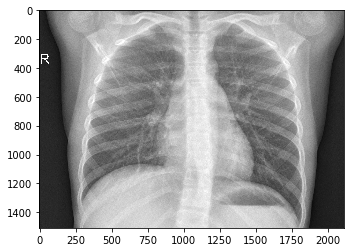

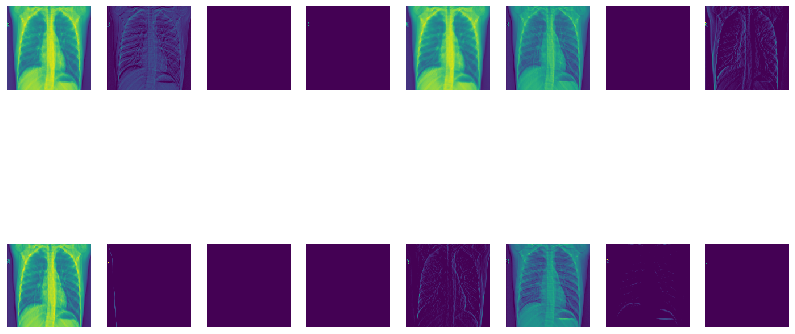

(1, 72, 72, 20)


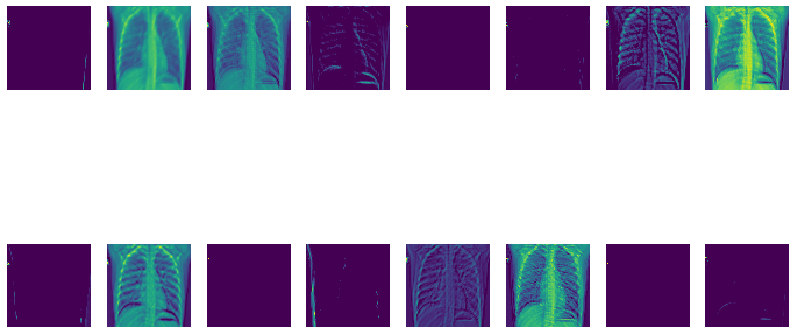

(1, 34, 34, 50)


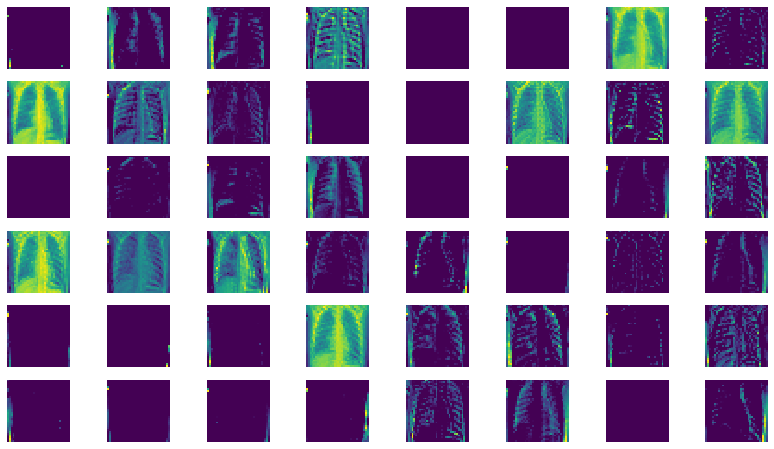

(1, 148, 148, 16)


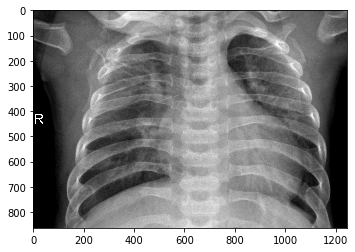

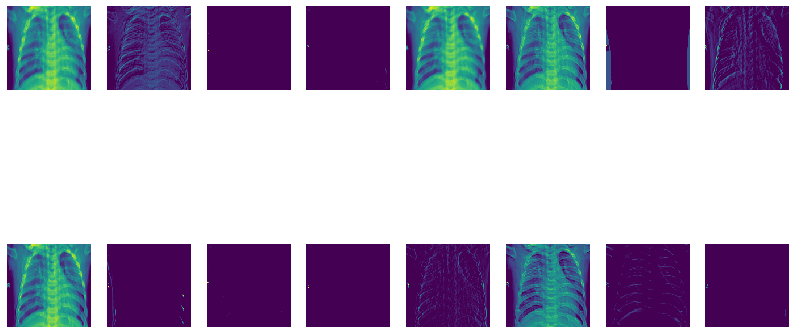

(1, 72, 72, 20)


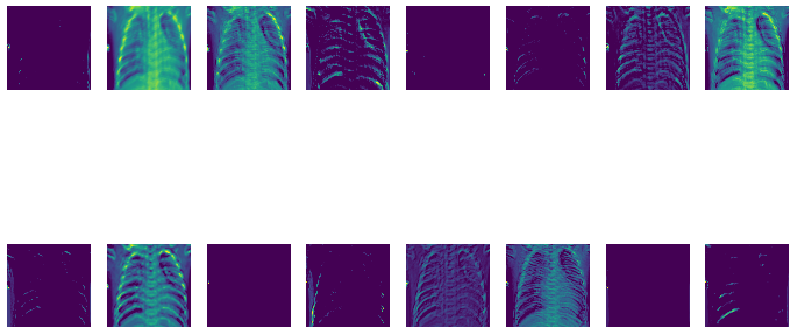

(1, 34, 34, 50)


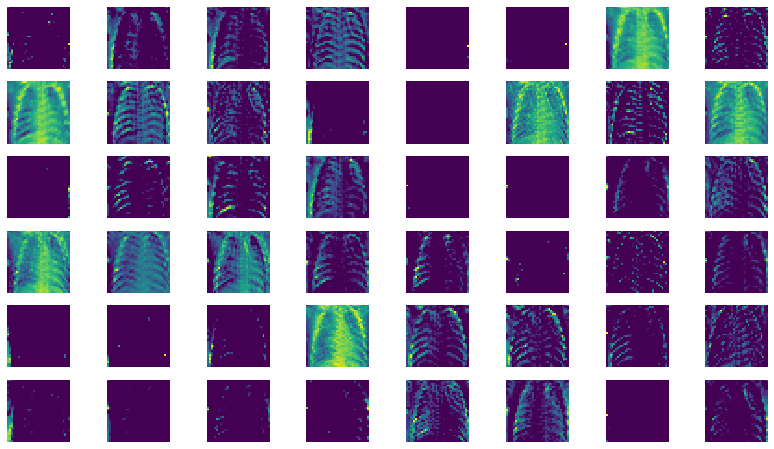

(1, 148, 148, 16)


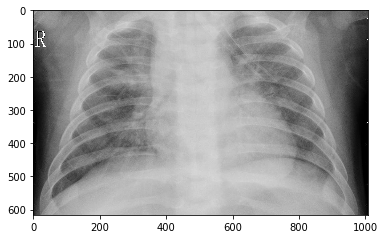

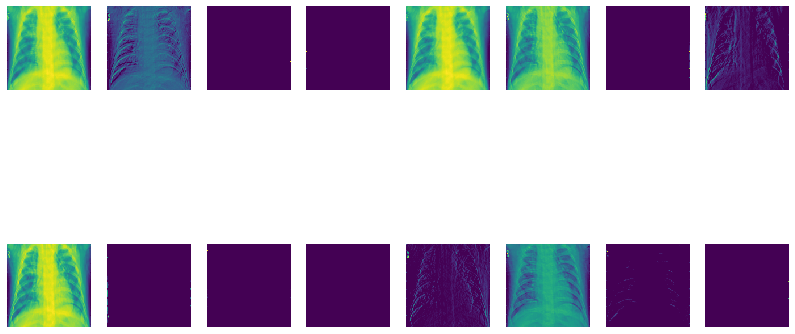

(1, 72, 72, 20)


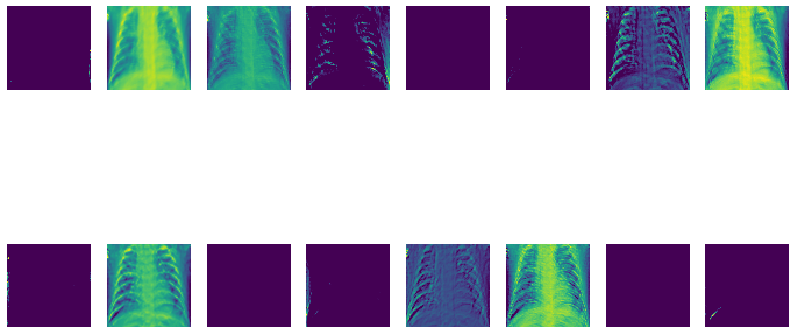

(1, 34, 34, 50)


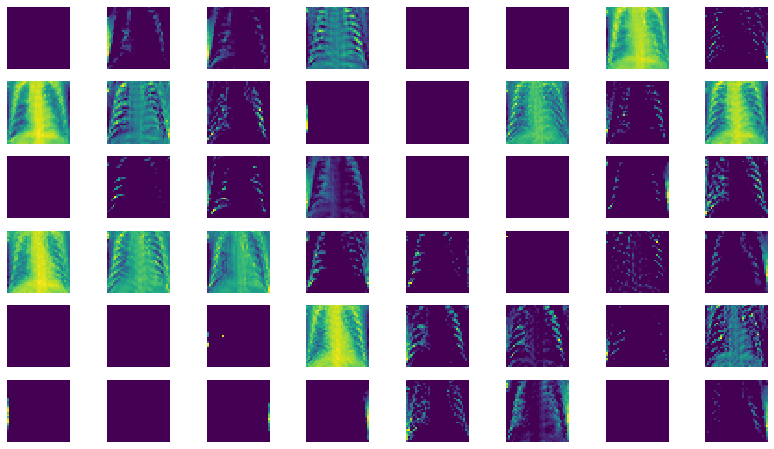

In [ ]:

def get_activation(layer,image):
    activation_model = Model(inputs=model.input, 
                            outputs=model.layers[layer].output)
    return activation_model.predict(image)


def plot(activation):
    NUM_COLUMNS = 8
    print(activation.shape)
    num_filters = activation.shape[3]
    num_rows = num_filters // NUM_COLUMNS
    fig,axs = plt.subplots(num_rows,NUM_COLUMNS, figsize=(14,8))
    for r in range(num_rows):
        for c in range(NUM_COLUMNS):
            filter = r*NUM_COLUMNS+c
            axs[r,c].imshow(activation[0,:,:,filter])
            axs[r,c].axis('off')
    plt.show()

entries = ('normal','bacteria','virus')
for m,entry in zip(range(len(entries)),entries):
    files = os.listdir('./dataset/output/train/'+entry)
    for j in range(1):
        file = './dataset/output/train/'+entry+'/'+files[j]
        img = cv2.imread(file,cv2.IMREAD_COLOR)
        plt.imshow(img)
        dim = (150, 150)
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        img = img.reshape(1,150,150,3)
        img = img/255
        for layer in (0,3,5):
            plot(get_activation(layer,img))
            
            


Visualizamos los filtros aplicados en cada una de las capas.
De esta forma podemos ver como la información cada vez es más elaborada.

Además podemos observar como existen filtros que realzan determinadas partes de las imágenes: bordes, texturas, huesos, partes blandas,etc.
    
Esta información es importante debido a que si se la mostrásemos a un médico especialista, este podría aprender en qué se "fija" el algoritmo para realizar la predicción 
y contrastar si esas técnicas de observación (en zonas determinadas) son nuevas para los facultativos.


### BIBLIOGRAFÍA Y WEBGRAFÍA


    
    https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2#:~:text=Exploratory%20data%20analysis%20comprises%20of,of%20predictors%20across%20different%20classes
    
    https://enmilocalfunciona.io/tratamiento-de-imagenes-usando-imagedatagenerator-en-keras/
    
    https://claudiovz.github.io/scipy-lecture-notes-ES/advanced/image_processing/index.html
    
    https://scipy-lectures.org/advanced/image_processing/
        
    "Machine Learning y Deep Learning", Jesús Bobadilla Sancho
    
    Por último, agradecezco la gran ayuda prestada por mi compañero Alan Marquina Rodríguez para solventar algunos problemas    con algunas partes del código. 
    